This project was completed for the Statistics module in March 2022. 
The project involve performing a multiple regression analysis on income data. 
Exploratory analysis was performed with data visualisations.
Itterations of the regression analysis was then carried out, accounting for multicoliniarity, 
transforming variables through different forms of normalisation and removing insignificant variables to try and 
achieve a model with the highest accuracy. The results were then evaluater through thest such as Two-sample Kolmogorov-Smirnov test.
The data for this project was provided by NCI.

## Install relevant packages and load libraries 

In [6]:
#install.packages('car')
library(car)
#install.packages('caret')
library(caret)
#install.packages('olsrr')
library(olsrr)
#install.packages('ggplot2')
library(ggplot2)
#install.packages('ggthemes')
library(ggthemes)
#install.packages('scales')
library(scales)
#install.packages('Amelia')
library(Amelia)
#install.packages('dplyr')
library(dplyr)
#install.packages('leaps')
library(leaps)
#install.packages('haven')
library(haven)
#install.packages('gridExtra')
library(gridExtra)
#install.packages('regclass')
library(regclass)
#install.packages('purrr')
library(purrr)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages


Loading required package: carData

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages


Loading required package: ggplot2

Loading required package: lattice

also installing the dependencies ‘goftest’, ‘gridExtra’, ‘nortest’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages

The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages

The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages


also installing the dependency ‘RcppArmadillo’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2023 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 




The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages



Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages

The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages

The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


also installing the dependencies ‘glmnet’, ‘grpreg’, ‘pls’, ‘bestglm’, ‘VGAM’, ‘randomForest’, ‘rpart.plot’





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages


Loading required package: bestglm

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines


Attaching package: ‘VGAM’


The following object is masked from ‘package:caret’:

    predictors


The following object is masked from ‘package:car’:

    logit


Loading required package: rpart

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Important regclass change from 1.3:
All functions that had a . in the name now have an _
all.correlations -> all_correlations, cor.demo -> cor_demo, etc.



Attaching package: ‘regclass’


The following object is masked from ‘package:lattice’:

    qq





The downloaded binary packages are in
	/var/folders/9g/mnjyfn_d739ch1mvcb8hyk6r0000gn/T//RtmpWvUirl/downloaded_packages



Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard


The following object is masked from ‘package:caret’:

    lift


The following object is masked from ‘package:car’:

    some




## Load and display income data 

In [3]:
#import income data 
income <- read.csv('IncomeData.csv')
names(income)[names(income) == "income"] <- "salary"

In [4]:
head(income)

age yrsed edcat yrsempl salary creddebt othdebt  default jobsat homeown
1 45  6     1      4      17     0.371518 1.294482 0       4      1      
2 67  6     1     15      12     0.375552 0.392448 0       3      1      
3 68  6     1      7       9     0.200970 0.789030 0       5      0      
4 75  6     1     35      16     0.314096 0.757904 0       4      0      
5 38  7     1      8      37     0.143190 0.411810 0       3      0      
6 49  7     1      4      21     0.262143 1.270857 0       1      1      
  address cars carvalue
1 22      1     9.1    
2 28      1     5.9    
3 21      1     5.8    
4 11      1     5.8    
5 11      1    22.1    
6 14      1    10.8

In [7]:
str(income)

'data.frame':	4508 obs. of  13 variables:
 $ age     : int  45 67 68 75 38 49 52 61 62 68 ...
 $ yrsed   : int  6 6 6 6 7 7 7 7 7 7 ...
 $ edcat   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yrsempl : int  4 15 7 35 8 4 21 27 5 7 ...
 $ salary  : int  17 12 9 16 37 21 44 15 32 31 ...
 $ creddebt: num  0.372 0.376 0.201 0.314 0.143 ...
 $ othdebt : num  1.294 0.392 0.789 0.758 0.412 ...
 $ default : int  0 0 0 0 0 0 0 0 0 0 ...
 $ jobsat  : int  4 3 5 4 3 1 3 4 5 4 ...
 $ homeown : int  1 1 0 0 0 1 1 1 1 1 ...
 $ address : int  22 28 21 11 11 14 11 35 29 18 ...
 $ cars    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ carvalue: num  9.1 5.9 5.8 5.8 22.1 10.8 19.8 4.9 14.6 13.6 ...


In [8]:
#check for any missing data
sum(is.na(income))

[1] 0

In [9]:
#summary of income data 
summary(income)

      age            yrsed           edcat          yrsempl      
 Min.   :18.00   Min.   : 6.00   Min.   :1.000   Min.   : 0.000  
 1st Qu.:32.00   1st Qu.:12.00   1st Qu.:2.000   1st Qu.: 2.000  
 Median :46.00   Median :14.00   Median :2.000   Median : 7.000  
 Mean   :46.93   Mean   :14.53   Mean   :2.667   Mean   : 9.719  
 3rd Qu.:62.00   3rd Qu.:17.00   3rd Qu.:4.000   3rd Qu.:15.000  
 Max.   :79.00   Max.   :23.00   Max.   :5.000   Max.   :52.000  
     salary           creddebt           othdebt            default      
 Min.   :   9.00   Min.   :  0.0000   Min.   :  0.0000   Min.   :0.0000  
 1st Qu.:  24.00   1st Qu.:  0.3879   1st Qu.:  0.9828   1st Qu.:0.0000  
 Median :  38.00   Median :  0.9318   Median :  2.0816   Median :0.0000  
 Mean   :  55.41   Mean   :  1.8979   Mean   :  3.6915   Mean   :0.2389  
 3rd Qu.:  68.00   3rd Qu.:  2.0765   3rd Qu.:  4.4351   3rd Qu.:0.0000  
 Max.   :1073.00   Max.   :109.0726   Max.   :141.4591   Max.   :1.0000  
     jobsat         

## Data Visualisations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



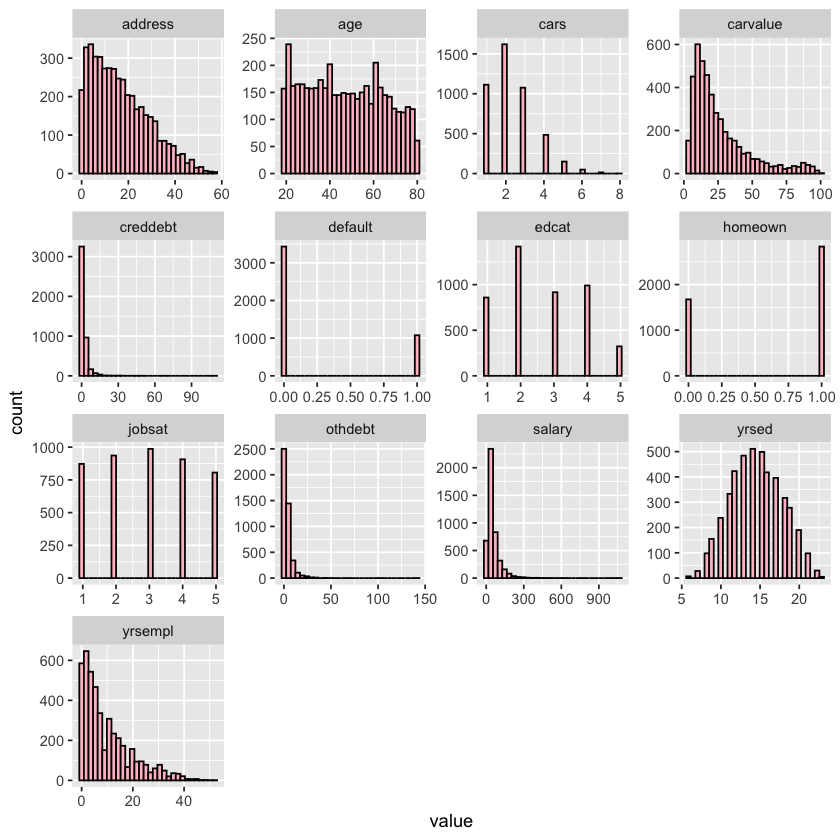

In [761]:
#histogram of each variable 
library(purrr)
library(tidyr)
library(ggplot2)
income %>%
  gather() %>% 
  ggplot(aes(value)) +
  facet_wrap(~ key, scales = "free") +
  geom_histogram(color="black", fill="pink")

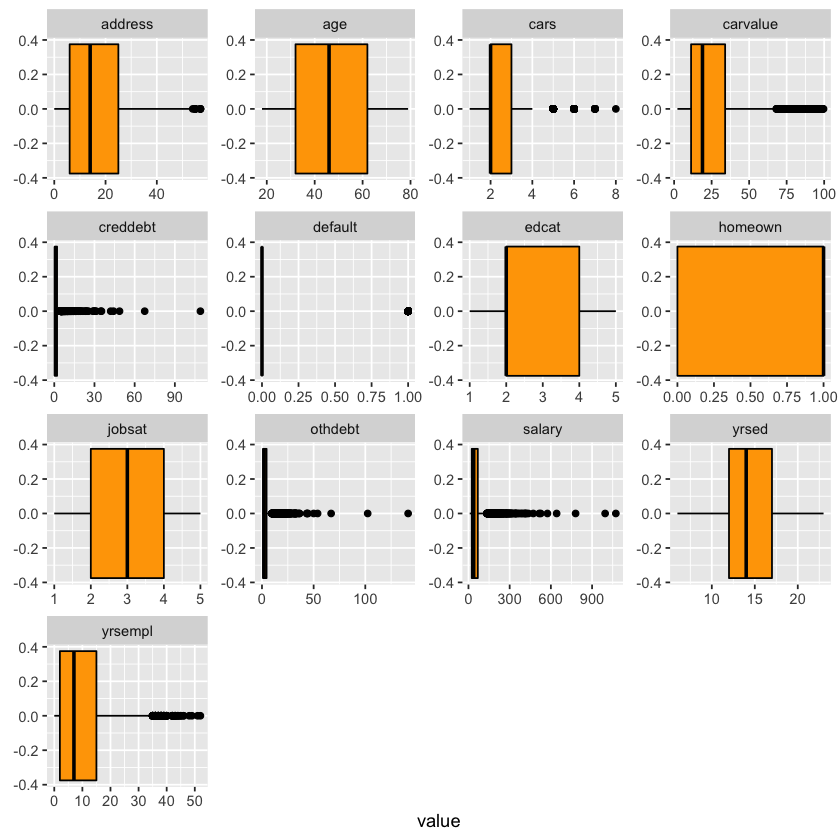

In [13]:
#Boxplot of each variable 
library(purrr)
library(tidyr)
library(ggplot2)
income %>%
  gather() %>% 
  ggplot(aes(value)) +
  facet_wrap(~ key, scales = "free") +
  geom_boxplot(color="black", fill="orange")

### Functions

In [560]:
#Set up function for plotting histogam of variables
plotVar <- function(var, breaks=20, label='')
{
    hist(var, freq=FALSE, breaks=breaks, col=rgb(1,1,0,0.4), 
         main=paste('Histogram of', label), xlab=label)
    curve(dnorm(x, mean=mean(var), sd=sd(var)), 
          from=min(var), to=max(var),
          col='red', lw=4, add=TRUE)
}

In [15]:
#Set up function for Two-sample Kolmogorov-Smirnov test
ks <- function(x)
{ set.seed(13); ks.test(x, rnorm(mean=mean(x), sd=sd(x), n=length(x))) }

## Evaluate variables which need to be normalised 

Income

In [562]:
#Caret library to evaluate which transformations should be made to data
caret::BoxCoxTrans(income$salary) 

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   24.00   38.00   55.41   68.00 1073.00 

Largest/Smallest: 119 
Sample Skewness: 5.23 

Estimated Lambda: -0.2 
With fudge factor, Lambda = 0 will be used for transformations


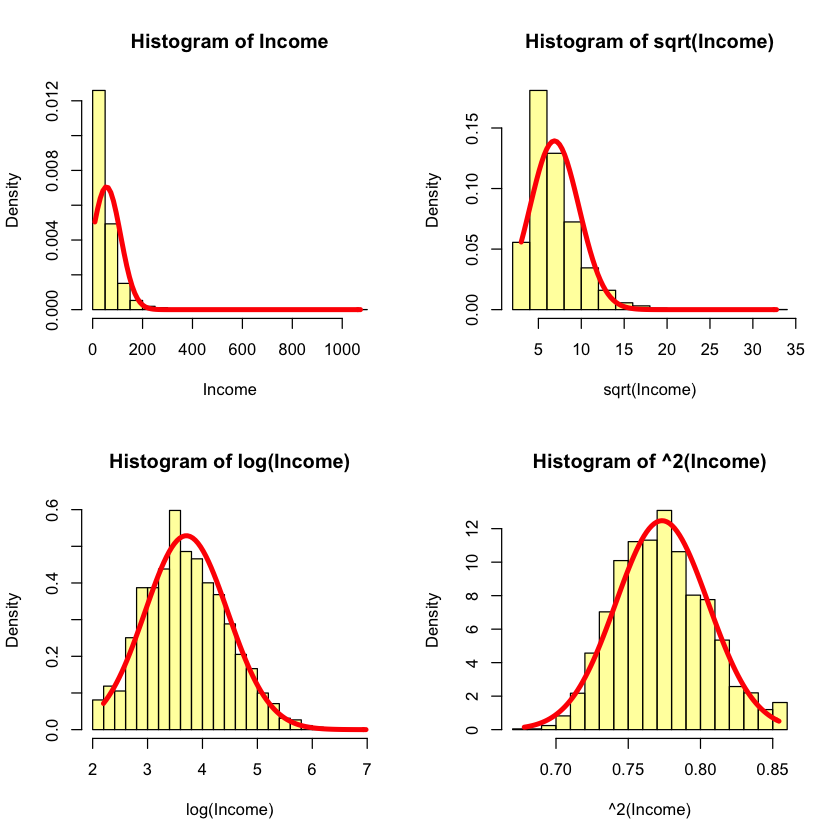

In [567]:
#Plot histograms of Income variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$salary, label='Income')
plotVar(sqrt(income$salary), label='sqrt(Income)')
plotVar(log(income$salary), label='log(Income)')
plotVar(log(income$salary)^-0.2, label='^2(Income)')

In [16]:
#Perform Two-sample Kolmogorov-Smirnov test on income variable 
ks((income$salary)^-0.2) #Passes KS test

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.027063, p-value = 0.07364
alternative hypothesis: two-sided


### Car Value

In [570]:
caret::BoxCoxTrans(income$carvalue)

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.20   11.30   18.90   26.08   34.00   99.60 

Largest/Smallest: 45.3 
Sample Skewness: 1.53 

Estimated Lambda: 0 
With fudge factor, Lambda = 0 will be used for transformations


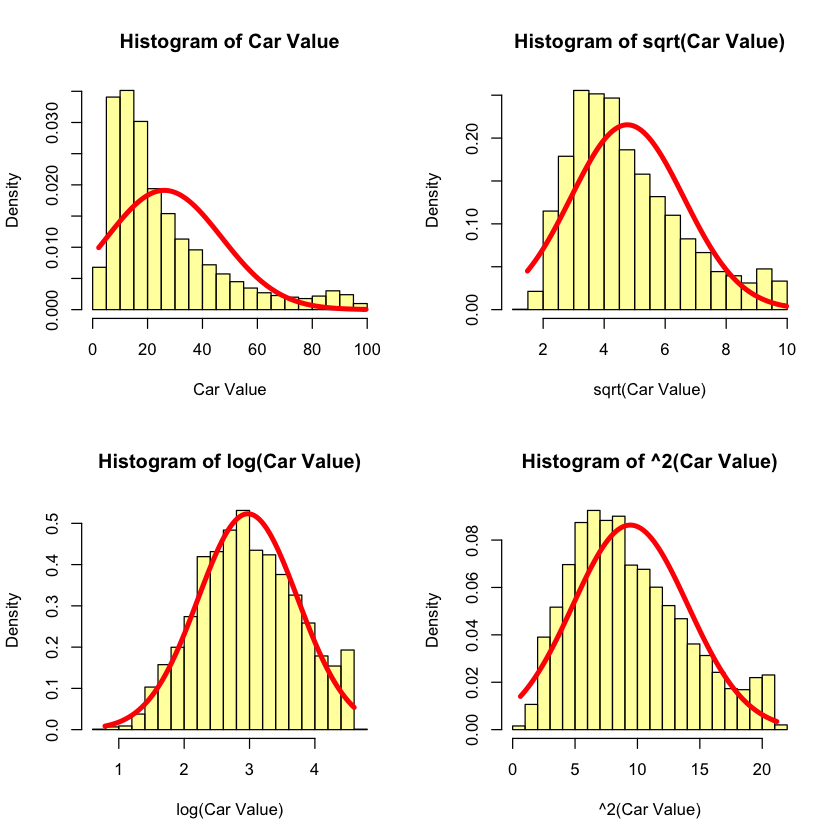

In [574]:
#Plot histograms of Car Value variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$carvalue, label='Car Value')
plotVar(sqrt(income$carvalue), label='sqrt(Car Value)')
plotVar(log(income$carvalue), label='log(Car Value)')
plotVar(log(income$carvalue)^2, label='^2(Car Value)')

In [318]:
ks(log(income$carvalue))

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.029947, p-value = 0.0351
alternative hypothesis: two-sided


### CARS - Number of cars owned 

In [575]:
caret::BoxCoxTrans(income$cars)

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.367   3.000   8.000 

Largest/Smallest: 8 
Sample Skewness: 0.874 

Estimated Lambda: 0.2 


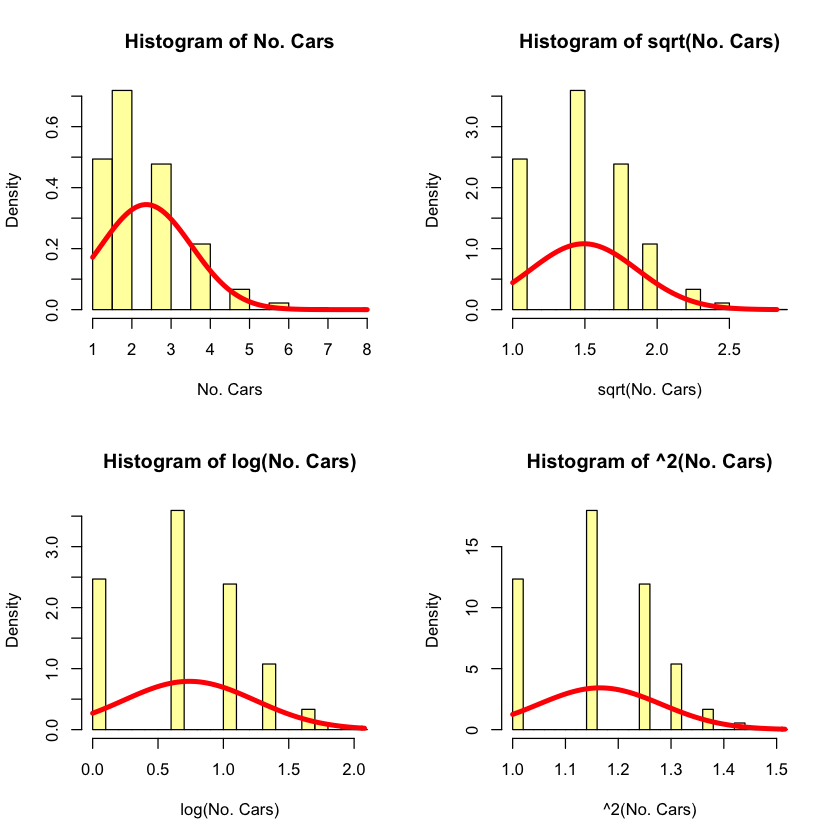

In [576]:
#Plot histograms of CARS variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$cars, label='No. Cars')
plotVar(sqrt(income$cars), label='sqrt(No. Cars)')
plotVar(log(income$cars), label='log(No. Cars)')
plotVar((income$cars)^0.2, label='^2(No. Cars)')

In [577]:
ks((income$othdebt)^0.2)

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.036823, p-value = 0.004429
alternative hypothesis: two-sided


### Yrsempl - years at current job

In [578]:
caret::BoxCoxTrans(income$yrsempl+1)

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    8.00   10.72   16.00   53.00 

Largest/Smallest: 53 
Sample Skewness: 1.25 

Estimated Lambda: 0.2 


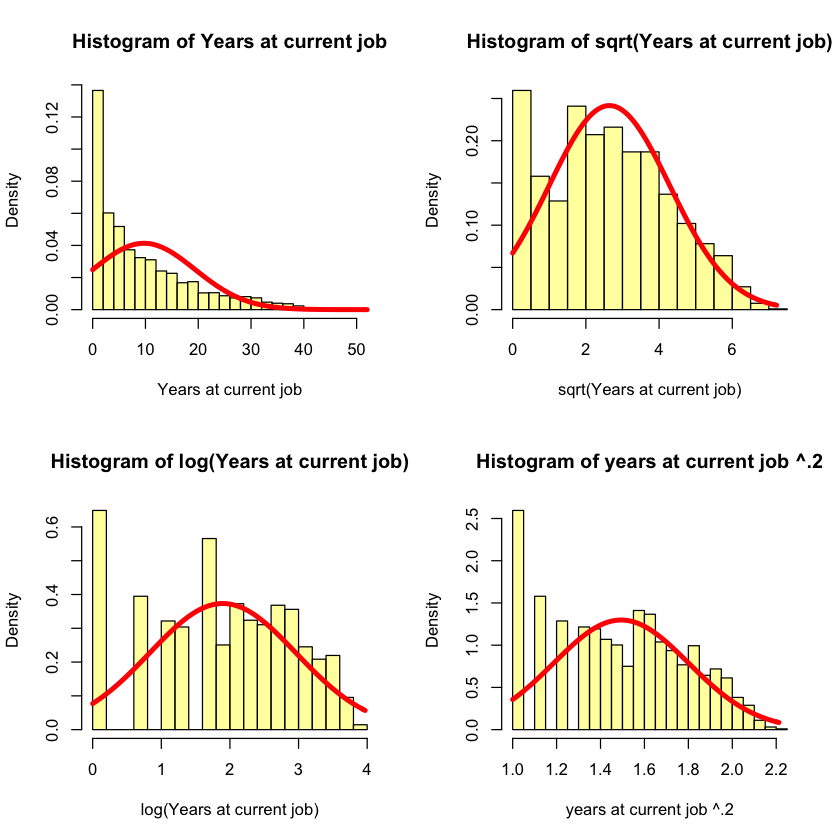

In [579]:
#Plot histograms of Income variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$yrsempl, label='Years at current job')
plotVar(sqrt(income$yrsempl), label='sqrt(Years at current job)')
plotVar(log(income$yrsempl+1), label='log(Years at current job)')
plotVar((income$yrsempl+1)^0.2, label='years at current job ^.2')

In [329]:
ks((income$yrsempl+1)^0.2)

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.078971, p-value = 1.234e-12
alternative hypothesis: two-sided


### creddebt - Credit card debt in thousands 

In [580]:
caret::BoxCoxTrans(income$creddebt+1)

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.388   1.932   2.898   3.077 110.073 

Largest/Smallest: 110 
Sample Skewness: 11 

Estimated Lambda: -0.8 


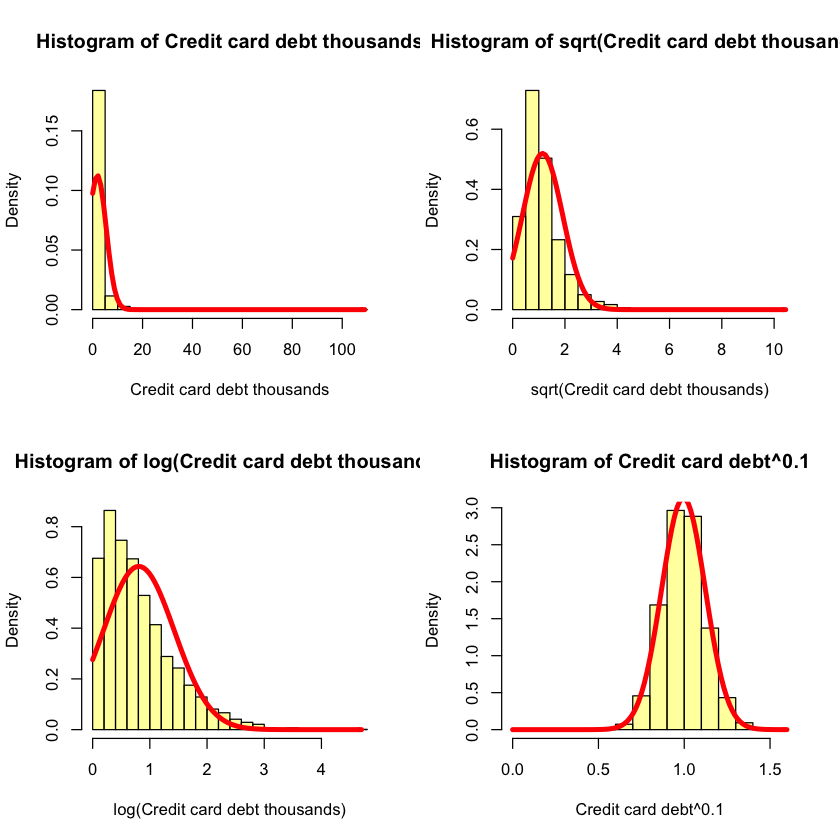

In [587]:
#Plot histograms of creddebt variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$creddebt, label='Credit card debt thousands')
plotVar(sqrt(income$creddebt), label='sqrt(Credit card debt thousands)')
plotVar(log(income$creddebt+1), label='log(Credit card debt thousands)')
plotVar(income$creddebt^0.1, label='Credit card debt^0.1')

In [583]:
ks((income$creddebt)**0.1)

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.018412, p-value = 0.4294
alternative hypothesis: two-sided


### othdebt - Other debt in thousands

In [585]:
caret::BoxCoxTrans(income$othdebt+1)

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.983   3.082   4.691   5.435 142.459 

Largest/Smallest: 142 
Sample Skewness: 7.69 

Estimated Lambda: -0.4 


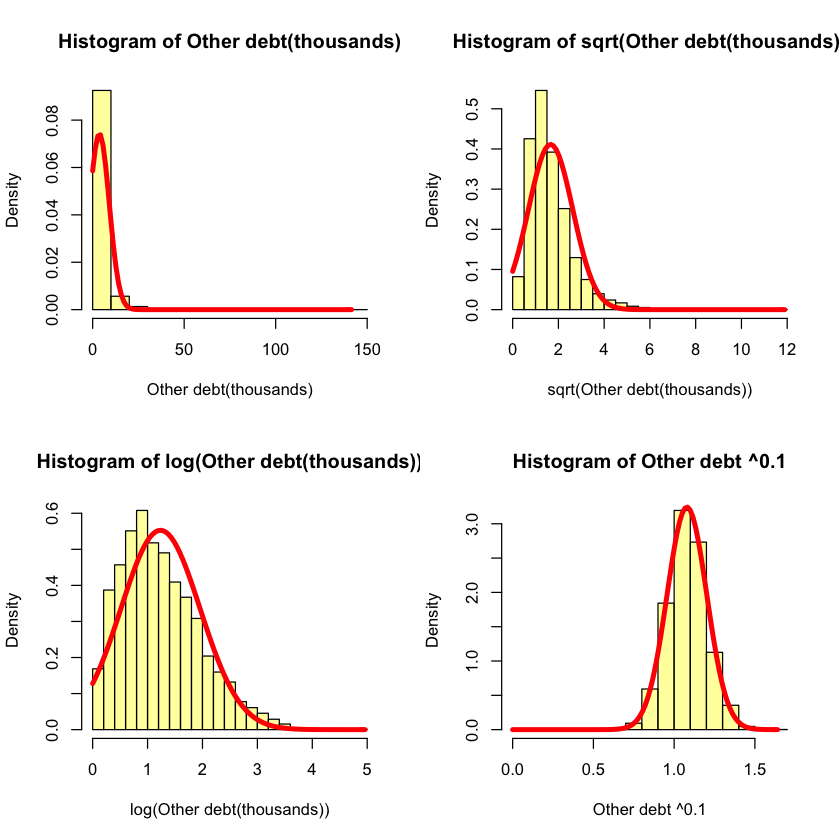

In [649]:
#Plot histograms of othdebt variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$othdebt, label='Other debt(thousands)')
plotVar(sqrt(income$othdebt), label='sqrt(Other debt(thousands))')
plotVar(log(income$othdebt+1), label='log(Other debt(thousands))')
plotVar(income$othdebt^0.1, label='Other debt ^0.1') ### ^ of 0.2

In [591]:
ks((income$othdebt)^0.1)

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.016193, p-value = 0.5956
alternative hypothesis: two-sided


### Address - Years at current address

In [593]:
caret::BoxCoxTrans(income$address+1)

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   15.00   17.37   26.00   58.00 

Largest/Smallest: 58 
Sample Skewness: 0.717 

Estimated Lambda: 0.4 


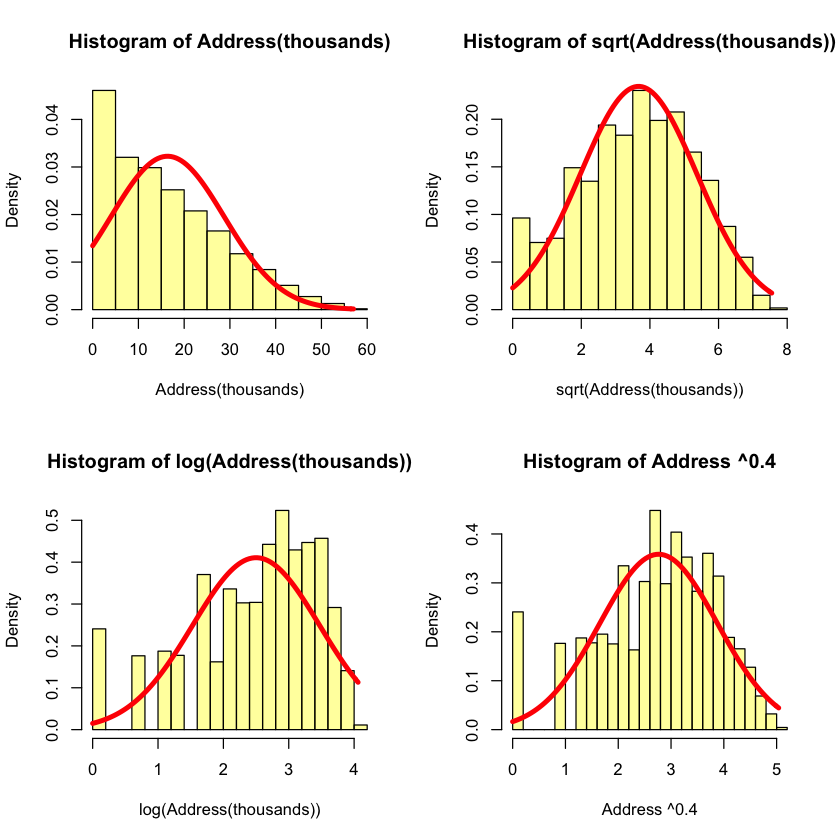

In [594]:
#Plot histograms of address variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$address, label='Address(thousands)')
plotVar(sqrt(income$address), label='sqrt(Address(thousands))') ###Sqrt 
plotVar(log(income$address+1), label='log(Address(thousands))')
plotVar(income$address^0.4, label='Address ^0.4')

In [597]:
ks(sqrt(income$address))

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.046806, p-value = 0.0001028
alternative hypothesis: two-sided


### yrsed - Ever defaulted on a bank loan ###

In [598]:
caret::BoxCoxTrans(income$yrsed)

Box-Cox Transformation

4508 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   12.00   14.00   14.53   17.00   23.00 

Largest/Smallest: 3.83 
Sample Skewness: 0.0197 

Estimated Lambda: 0.9 
With fudge factor, no transformation is applied


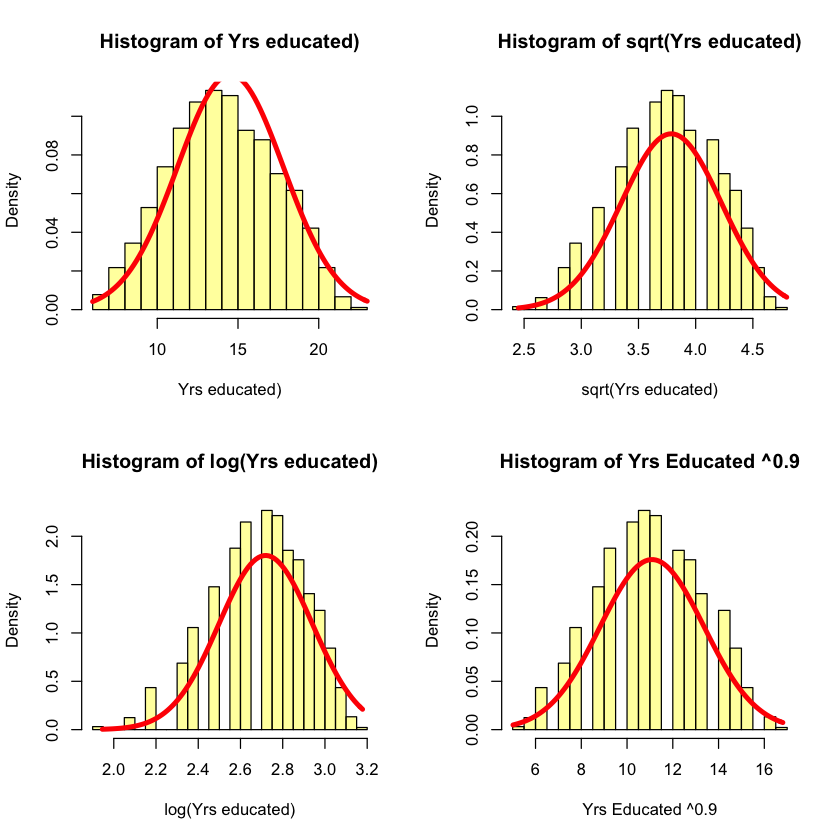

In [599]:
#Plot histograms of yrsed variable as is and with log and sqrt transformations
par(mfrow=c(2,2))
plotVar(income$yrsed, label='Yrs educated)')
plotVar(sqrt(income$yrsed), label='sqrt(Yrs educated)') ###Sqrt 
plotVar(log(income$yrsed+1), label='log(Yrs educated)')
plotVar(income$yrsed^0.9, label='Yrs Educated ^0.9')

In [601]:
ks((income$yrsed)^0.9)

Warning message in ks.test(x, rnorm(mean = mean(x), sd = sd(x), n = length(x))):
“p-value will be approximate in the presence of ties”



	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.074091, p-value = 3.58e-11
alternative hypothesis: two-sided


# Correlation matrix - check for multicoliniarity

age   yrsed edcat yrsempl salary creddebt
age       1.00 -0.09 -0.08  0.70   0.19   0.12    
yrsed    -0.09  1.00  0.96 -0.22   0.17   0.10    
edcat    -0.08  0.96  1.00 -0.20   0.17   0.10    
yrsempl   0.70 -0.22 -0.20  1.00   0.32   0.19    
salary    0.19  0.17  0.17  0.32   1.00   0.67    
creddebt  0.12  0.10  0.10  0.19   0.67   1.00

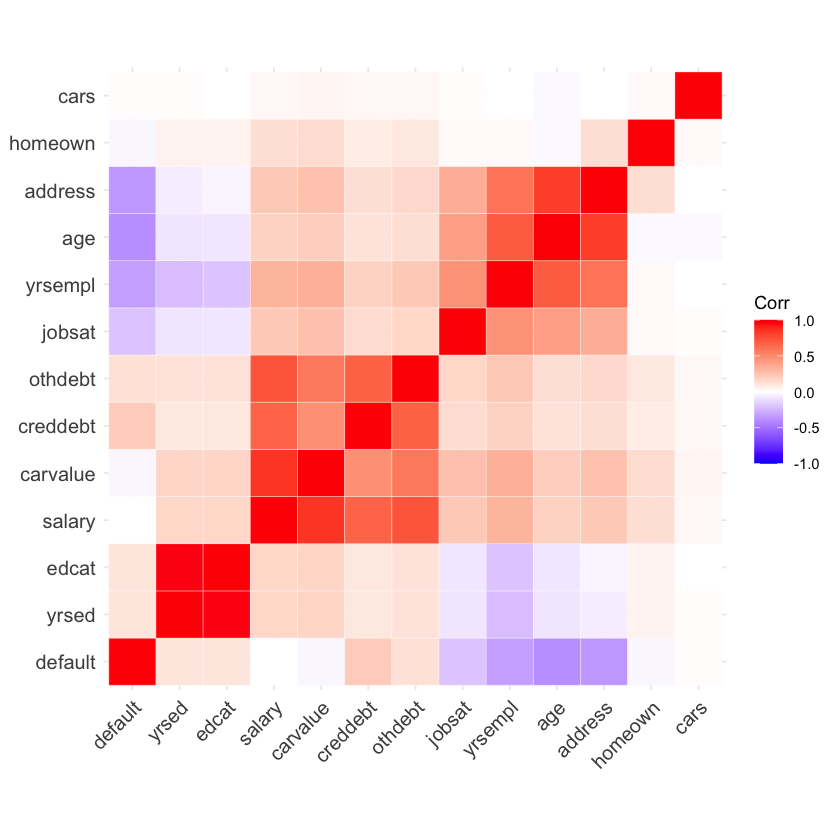

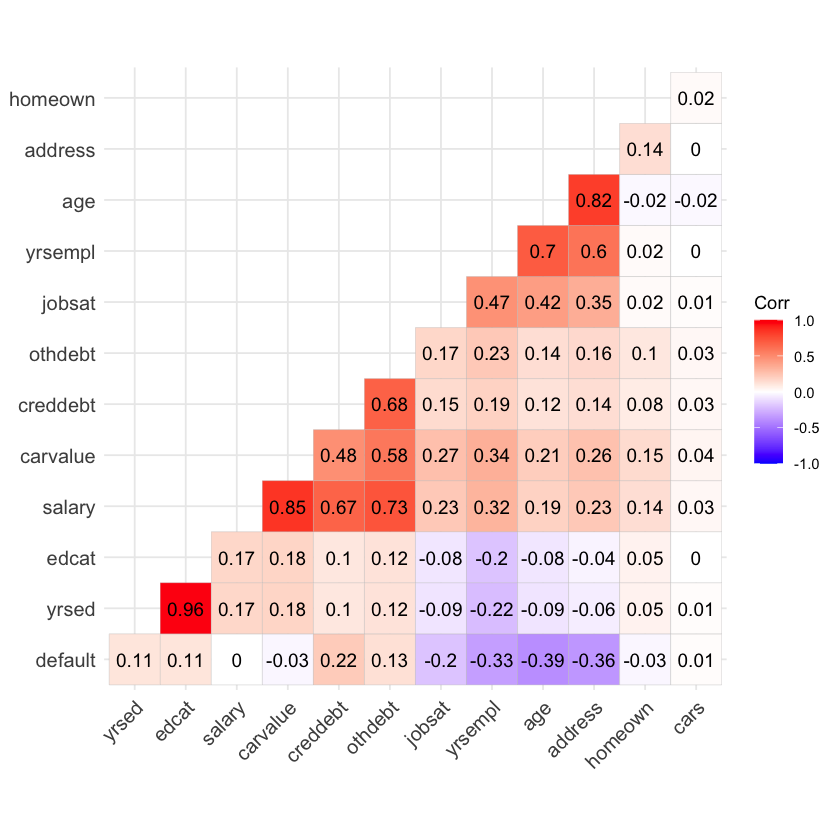

In [226]:
#yesed and education -> 0.96
# age and address -> 0.82
#correlation matrix ### checking variables for multicoliniarity  
library(ggcorrplot)
# Compute a correlation matrix
# testing for multicoliniarity 
corr <- round(cor(income, method = 'pearson'), digits = 2)
head(corr[, 1:6])
# Visualize the correlation matrix
# Reordering the correlation matrix
# --------------------------------
# using hierarchical clustering
ggcorrplot(corr, hc.order = TRUE, outline.col = "white")
# Add correlation coefficients
# --------------------------------
# argument lab = TRUE
ggcorrplot(corr, hc.order = TRUE, type = "lower",
           lab = TRUE)


# Linear Model 1 - Including all original variables 

In [7]:
#Make multiple regression model including all original variablles.
lmfit1 <- lm(salary ~ . , income )  #yrsempl creddebt othdebt default jobsat carvalue age - most significant 
#Display a summary of the model 
summary(lmfit1)                     #Adjusted R-squared:  0.8333 


Call:
lm(formula = salary ~ ., data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-115.98   -6.59    0.36    6.16  414.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.64814    3.56763  -0.182 0.855848    
age         -0.09017    0.04032  -2.236 0.025378 *  
yrsed        0.30305    0.39652   0.764 0.444755    
edcat        0.27743    1.06878   0.260 0.795200    
yrsempl      0.21671    0.05582   3.883 0.000105 ***
creddebt     3.77536    0.13791  27.375  < 2e-16 ***
othdebt      2.41891    0.09537  25.365  < 2e-16 ***
default     -8.64091    0.93356  -9.256  < 2e-16 ***
jobsat      -0.70607    0.28869  -2.446 0.014491 *  
homeown      0.34352    0.74501   0.461 0.644755    
address     -0.01743    0.05111  -0.341 0.733152    
cars        -0.25999    0.29749  -0.874 0.382190    
carvalue     1.60210    0.02223  72.075  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.07 on 

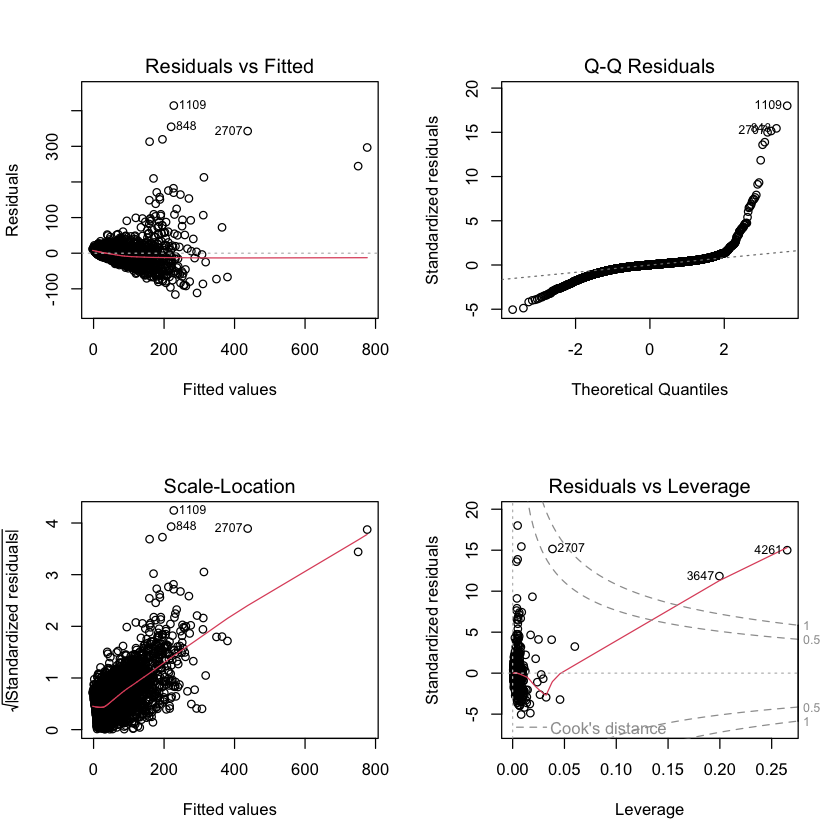

In [8]:
#Plot the model
par(mfrow=c(2,2))
plot(lmfit1)        

In [284]:
#Non-constant Variance Score Test
ncvTest(lmfit1)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 23023.49, Df = 1, p = < 2.22e-16

# LM fit 2 - irrelevant values excluded 

In [283]:
ncvTest(lmfit2)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 13.61769, Df = 1, p = 0.00022406

# Transform non normal variables SALARY, CREDDEBT, OTHDEBT  

In [18]:
data1 <- income 
data2 <- income
data3 <- income
#head(data1)

In [19]:
data1$salary <- log(data1$salary)
data1$creddebt<- sqrt(data1$creddebt)
data1$othdebt<- sqrt(data1$othdebt)
#head(data1)

In [20]:
data2$salary <- (data2$salary)^0.2
data2$creddebt <- (data2$creddebt)^0.1
data2$othdebt <- (data2$othdebt)^0.1
#head(data2)

In [21]:
data3$salary <- log(data3$salary)
data3$creddebt<- log(data3$creddebt)
data3$othdebt<- log(data3$othdebt)
#head(data3)

In [22]:
#remove outliers from Original income data
outliers <- boxplot.stats(income$salary)$out#Remove outliers from original data 
outliers7 <- boxplot.stats(income$othdebt)$out 
outliers8 <- boxplot.stats(income$creddebt)$out 
str(outliers)
str(outliers7)
str(outliers8)
data <- income[-which(income$salary %in% outliers),]
data <- income[-which(income$othdebt %in% outliers7),] 
data <- income[-which(income$creddebt %in% outliers8),] #DATA -> outliers removed from OG income 
head(data)
#Remove outliers from Log Salary income data, from creddebt and othdebt
outliers1 <- boxplot.stats(data1$salary)$out   
outliers2 <- boxplot.stats(data1$creddebt)$out
outliers3 <- boxplot.stats(data1$othdebt)$out
str(outliers1)
str(outliers2)
str(outliers3)
datalog <- data1[-which(data1$salary %in% outliers1),]
datalog <- data1[-which(data1$creddebt %in% outliers2),]
datalog <- data1[-which(data1$othdebt %in% outliers3),]
head(datalog)
#Remove outliers from ^0.2 Salary income data
outliers4 <- boxplot.stats(data2$salary)$out
outliers5 <- boxplot.stats(data2$creddebt)$out
outliers6 <- boxplot.stats(data2$othdebt)$out
str(outliers4)
str(outliers5)
str(outliers6)
expdata <- data2[-which(data2$salary %in% outliers4),]
expdata <- data2[-which(data2$creddebt %in% outliers5),]
expdata <- data2[-which(data2$othdebt %in% outliers6),]
head(expdata)
#Remove outliers from log Salary, Creddebt & Othdebt data 
outliers9 <- boxplot.stats(data3$salary)$out
outliers10 <- boxplot.stats(data3$creddebt)$out
outliers11 <- boxplot.stats(data3$othdebt)$out
str(outliers9)
str(outliers10)
str(outliers11)
logall <- data3[-which(data3$salary %in% outliers9),]
logall <- data3[-which(data3$creddebt %in% outliers10),]
logall <- data3[-which(data3$othdebt %in% outliers11),]
head(logall)

 int [1:304] 146 150 184 196 201 240 140 165 142 218 ...
 num [1:355] 9.83 11.07 23.47 10.48 13.75 ...
 num [1:411] 5.36 8.42 8.4 7.93 7.5 ...


age yrsed edcat yrsempl salary creddebt othdebt  default jobsat homeown
1 45  6     1      4      17     0.371518 1.294482 0       4      1      
2 67  6     1     15      12     0.375552 0.392448 0       3      1      
3 68  6     1      7       9     0.200970 0.789030 0       5      0      
4 75  6     1     35      16     0.314096 0.757904 0       4      0      
5 38  7     1      8      37     0.143190 0.411810 0       3      0      
6 49  7     1      4      21     0.262143 1.270857 0       1      1      
  address cars carvalue
1 22      1     9.1    
2 28      1     5.9    
3 21      1     5.8    
4 11      1     5.8    
5 11      1    22.1    
6 14      1    10.8

 num [1:24] 5.96 5.94 6.01 6.35 5.91 ...
 num [1:198] 2.9 2.9 2.82 2.74 3.02 ...
 num [1:171] 4.84 4.8 4.11 3.99 4.43 ...


age yrsed edcat yrsempl salary   creddebt  othdebt   default jobsat homeown
1 45  6     1      4      2.833213 0.6095228 1.1377530 0       4      1      
2 67  6     1     15      2.484907 0.6128230 0.6264567 0       3      1      
3 68  6     1      7      2.197225 0.4482968 0.8882736 0       5      0      
4 75  6     1     35      2.772589 0.5604427 0.8705768 0       4      0      
5 38  7     1      8      3.610918 0.3784045 0.6417242 0       3      0      
6 49  7     1      4      3.044522 0.5119990 1.1273229 0       1      1      
  address cars carvalue
1 22      1     9.1    
2 28      1     5.9    
3 21      1     5.8    
4 11      1     5.8    
5 11      1    22.1    
6 14      1    10.8

 num [1:65] 2.99 3.11 3.29 3.04 3.28 ...
 num [1:50] 0.64 0.628 0.603 1.342 1.336 ...
 num [1:39] 0.751 0.752 1.418 0.684 1.479 ...


age yrsed edcat yrsempl salary   creddebt  othdebt   default jobsat homeown
1 45  6     1      4      1.762340 0.9057284 1.0261471 0       4      1      
2 67  6     1     15      1.643752 0.9067071 0.9107060 0       3      1      
3 68  6     1      7      1.551846 0.8517519 0.9765834 0       5      0      
4 75  6     1     35      1.741101 0.8906483 0.9726608 0       4      0      
5 38  7     1      8      2.058924 0.8233629 0.9151024 0       3      0      
6 49  7     1      4      1.838416 0.8746893 1.0242587 0       1      1      
  address cars carvalue
1 22      1     9.1    
2 28      1     5.9    
3 21      1     5.8    
4 11      1     5.8    
5 11      1    22.1    
6 14      1    10.8

 num [1:24] 5.96 5.94 6.01 6.35 5.91 ...
 num [1:59] -4.12 -3.66 -4.46 -4.65 -5.06 ...
 num [1:50] -2.86 -2.54 -2.78 -2.68 -2.85 ...


age yrsed edcat yrsempl salary   creddebt   othdebt    default jobsat homeown
1 45  6     1      4      2.833213 -0.9901580  0.2581106 0       4      1      
2 67  6     1     15      2.484907 -0.9793583 -0.9353512 0       3      1      
3 68  6     1      7      2.197225 -1.6045996 -0.2369509 0       5      0      
4 75  6     1     35      2.772589 -1.1580566 -0.2771986 0       4      0      
5 38  7     1      8      3.610918 -1.9435829 -0.8871932 0       3      0      
6 49  7     1      4      3.044522 -1.3388651  0.2396915 0       1      1      
  address cars carvalue
1 22      1     9.1    
2 28      1     5.9    
3 21      1     5.8    
4 11      1     5.8    
5 11      1    22.1    
6 14      1    10.8

In [23]:
summary(income$salary)
summary(data$salary)
summary(datalog$salary)
summary(expdata$salary)
summary(logall$salary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   24.00   38.00   55.41   68.00 1073.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   22.00   35.00   47.15   59.00  575.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.197   3.135   3.611   3.650   4.143   6.157 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.552   1.888   2.070   2.119   2.319   3.643 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.197   3.178   3.638   3.708   4.220   6.465 

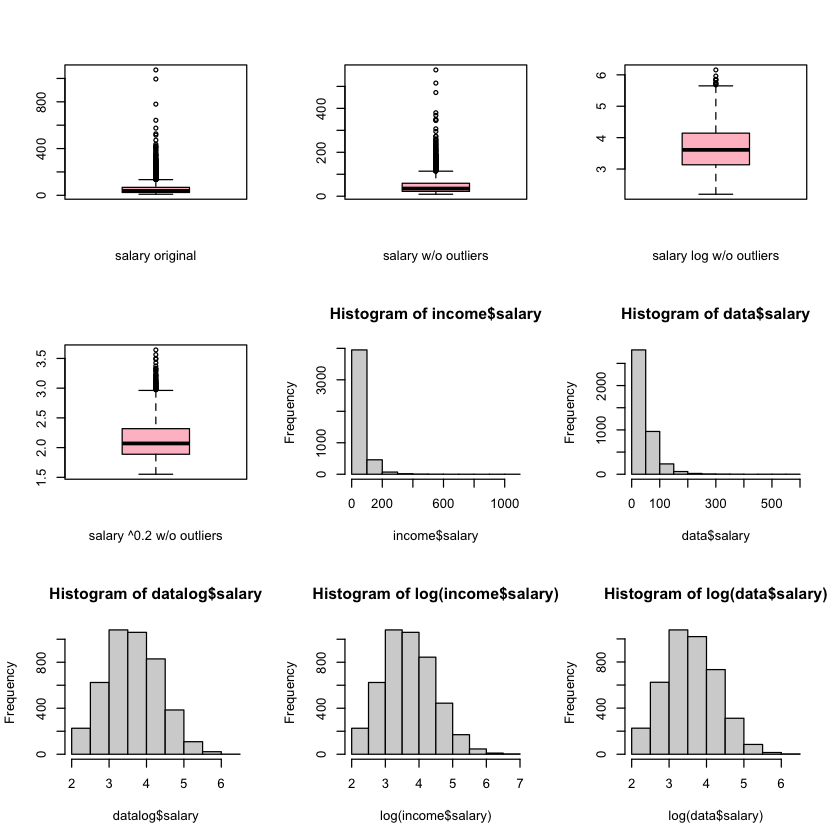

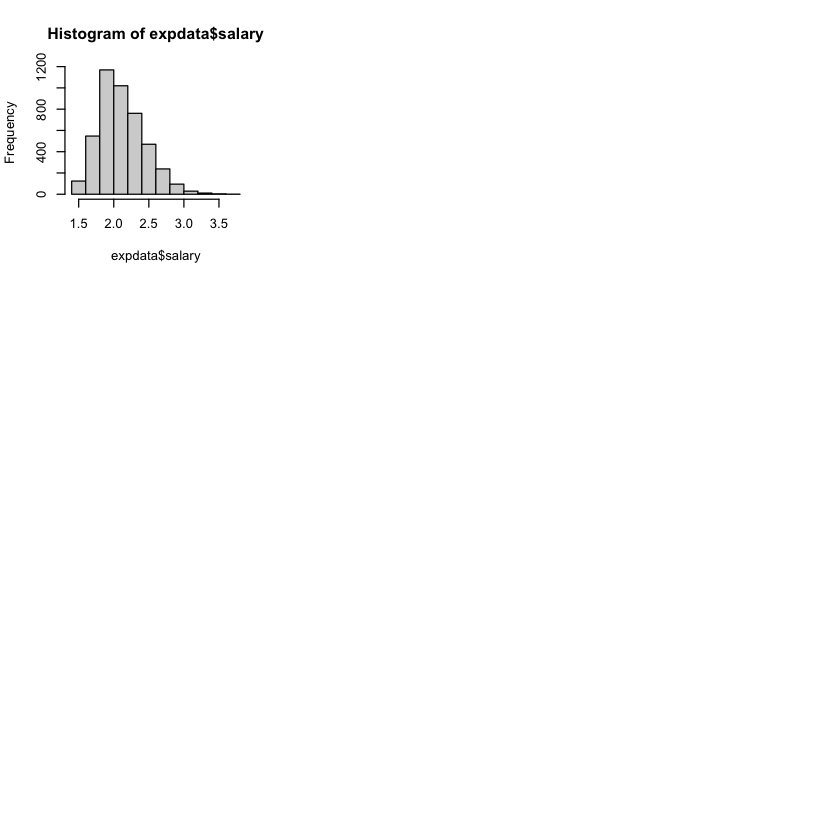

In [27]:
###Hist of the Salary variable for the d
par(mfrow = c(3, 3)) # Create a 4 x 3 plotting matrix
boxplot(income$salary, xlab = "salary original", main = "", col = 'pink')
boxplot(data$salary, xlab = "salary w/o outliers", main = "", col = 'pink')
boxplot(datalog$salary, xlab = "salary log w/o outliers", main = "", col = 'pink')
boxplot(expdata$salary, xlab = "salary ^0.2 w/o outliers", main = "", col = 'pink')
hist(income$salary)
hist(data$salary)
hist(datalog$salary)
hist(log(income$salary))
hist(log(data$salary))
hist(expdata$salary)

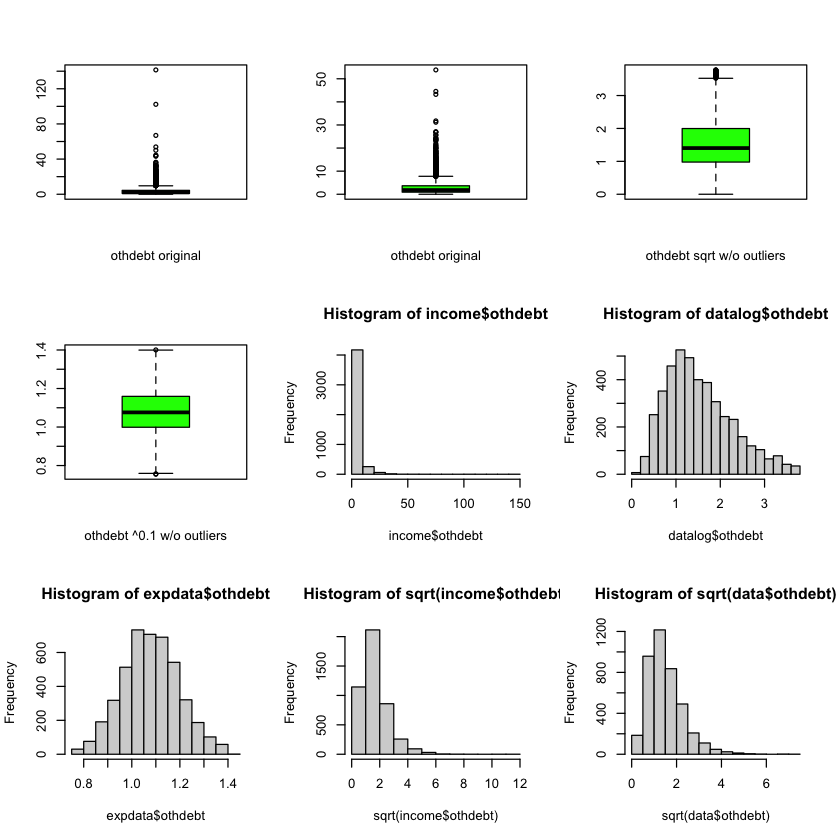

In [31]:
###Hist of the Othdebt variable for the d
par(mfrow = c(3, 3)) # Create a 4 x 3 plotting matrix
boxplot(income$othdebt, xlab = "othdebt original", main = "", col = 'green')
boxplot(data$othdebt, xlab = "othdebt original", main = "", col = 'green')
boxplot(datalog$othdebt, xlab = "othdebt sqrt w/o outliers", main = "", col = 'green')
boxplot(expdata$othdebt, xlab = "othdebt ^0.1 w/o outliers", main = "", col = 'green')
hist(income$othdebt)
hist(datalog$othdebt)
hist(expdata$othdebt)
hist(sqrt(income$othdebt))
hist(sqrt(data$othdebt))


# LM model LOG SALARY with multicoliniarity removed - edcat/yrsed and address/age yrsempl/age

variable names: age +yrsed +edcat +yrsempl +creddebt +othdebt +default +jobsat +homeown +address +cars +carvalue

In [678]:
lmmul <- lm(log(salary) ~. -edcat -age -cars -address, income )  #log salary on original data
                                                  #LM excluding multicoliniarity
summary(lmmul)                                    #Adjusted R-squared:  0.8309 

lmmul1 <- lm(log(salary) ~. -edcat -age -cars -address, data ) #Salary Othdebt CReddebt Outliers removed then log
summary(lmmul1)                                                   #Adjusted R-squared:  0.8162 

lmmul2 <- lm(salary ~. -edcat -age -cars -address, datalog )  #log(salary) sqrt(othdebt &creddebt) then outliers removed
                                                  #LM excluding multicoliniarity
summary(lmmul2)                                    #Adjusted R-squared:  0.8331                           

lmmul3 <- lm(salary ~. -edcat -age -cars -address, expdata )  #salary^0.2, othdebt &creddebt ^0.1 then outliers removed
                                                  #LM excluding multicoliniarity
summary(lmmul3)                                    #Adjusted R-squared:  0.8828 




Call:
lm(formula = log(salary) ~ . - edcat - age - cars - address, 
    data = income)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06142 -0.17888  0.03281  0.20060  1.01975 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.7360840  0.0256567 106.642  < 2e-16 ***
yrsed        0.0067808  0.0014998   4.521 6.31e-06 ***
yrsempl     -0.0052272  0.0006088  -8.587  < 2e-16 ***
creddebt     0.0097853  0.0018503   5.288 1.29e-07 ***
othdebt      0.0090423  0.0012818   7.055 1.99e-12 ***
default     -0.0662530  0.0121280  -5.463 4.94e-08 ***
jobsat       0.0235675  0.0038446   6.130 9.54e-10 ***
homeown      0.0270860  0.0096886   2.796   0.0052 ** 
carvalue     0.0306617  0.0002964 103.449  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3101 on 4499 degrees of freedom
Multiple R-squared:  0.8312,	Adjusted R-squared:  0.8309 
F-statistic:  2769 on 8 and 4499 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(salary) ~ . - edcat - age - cars - address, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1626 -0.1589  0.0226  0.1942  1.0604 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.6868233  0.0254760 105.465  < 2e-16 ***
yrsed        0.0053594  0.0014850   3.609 0.000311 ***
yrsempl     -0.0060571  0.0006059  -9.997  < 2e-16 ***
creddebt     0.0744055  0.0052382  14.204  < 2e-16 ***
othdebt      0.0123080  0.0016882   7.291 3.69e-13 ***
default     -0.0813099  0.0125010  -6.504 8.75e-11 ***
jobsat       0.0195196  0.0038400   5.083 3.88e-07 ***
homeown      0.0287180  0.0095884   2.995 0.002760 ** 
carvalue     0.0310440  0.0003388  91.621  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2953 on 4088 degrees of freedom
Multiple R-squared:  0.8165,	Adjusted R-squared:  0.8162 
F-statistic:  2274 on 8 and 4088 DF,  p-value: < 2.2e-16



Call:
lm(formula = salary ~ . - edcat - age - cars - address, data = datalog)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07046 -0.16838  0.02073  0.18660  0.96632 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.5691989  0.0246299 104.312  < 2e-16 ***
yrsed        0.0053865  0.0014125   3.813 0.000139 ***
yrsempl     -0.0059458  0.0005769 -10.307  < 2e-16 ***
creddebt     0.0867302  0.0093178   9.308  < 2e-16 ***
othdebt      0.1474282  0.0080292  18.361  < 2e-16 ***
default     -0.1055048  0.0117167  -9.005  < 2e-16 ***
jobsat       0.0166558  0.0036521   4.561 5.24e-06 ***
homeown      0.0227464  0.0091117   2.496 0.012583 *  
carvalue     0.0287986  0.0003152  91.374  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2879 on 4328 degrees of freedom
Multiple R-squared:  0.8334,	Adjusted R-squared:  0.8331 
F-statistic:  2705 on 8 and 4328 DF,  p-value: < 2.2e-16



Call:
lm(formula = salary ~ . - edcat - age - cars - address, data = expdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42121 -0.06734  0.00015  0.06731  0.58281 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.1633707  0.0205044  56.738  < 2e-16 ***
yrsed        0.0025132  0.0005356   4.693 2.78e-06 ***
yrsempl     -0.0013944  0.0002167  -6.435 1.36e-10 ***
creddebt     0.2055293  0.0189772  10.830  < 2e-16 ***
othdebt      0.3592302  0.0206321  17.411  < 2e-16 ***
default     -0.0385073  0.0043219  -8.910  < 2e-16 ***
jobsat       0.0061806  0.0013747   4.496 7.10e-06 ***
homeown      0.0090693  0.0034560   2.624  0.00871 ** 
carvalue     0.0126011  0.0001118 112.720  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1103 on 4460 degrees of freedom
Multiple R-squared:  0.883,	Adjusted R-squared:  0.8828 
F-statistic:  4207 on 8 and 4460 DF,  p-value: < 2.2e-16


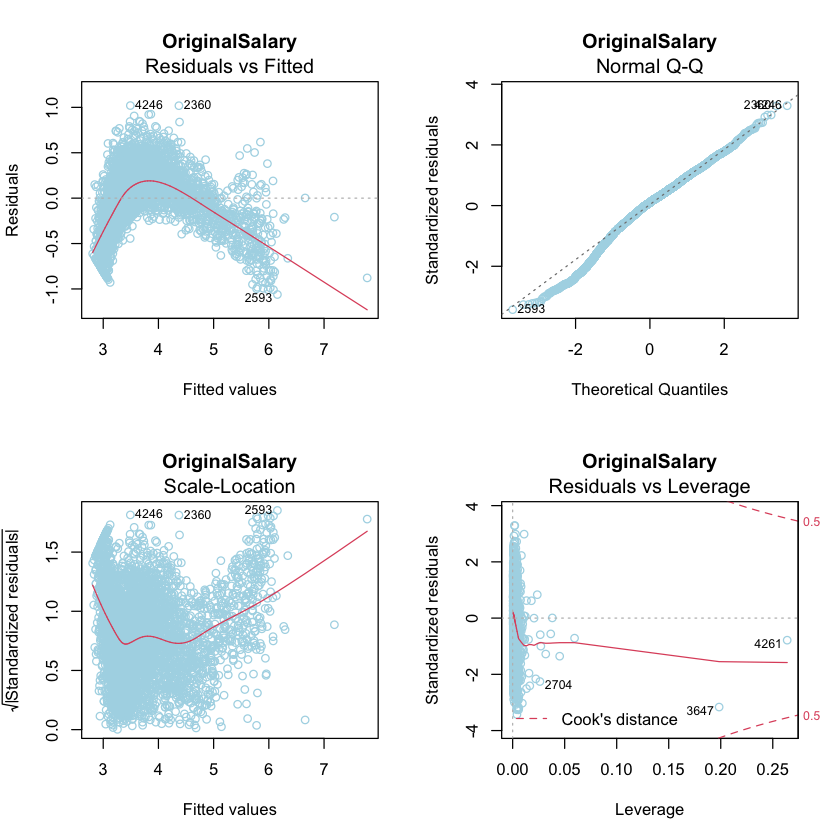

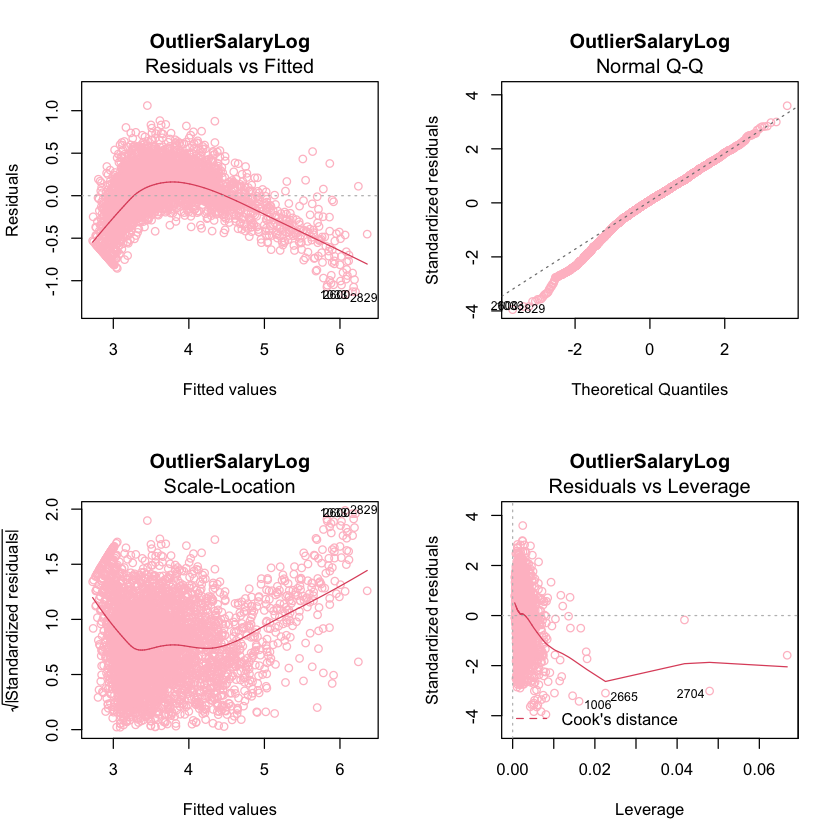

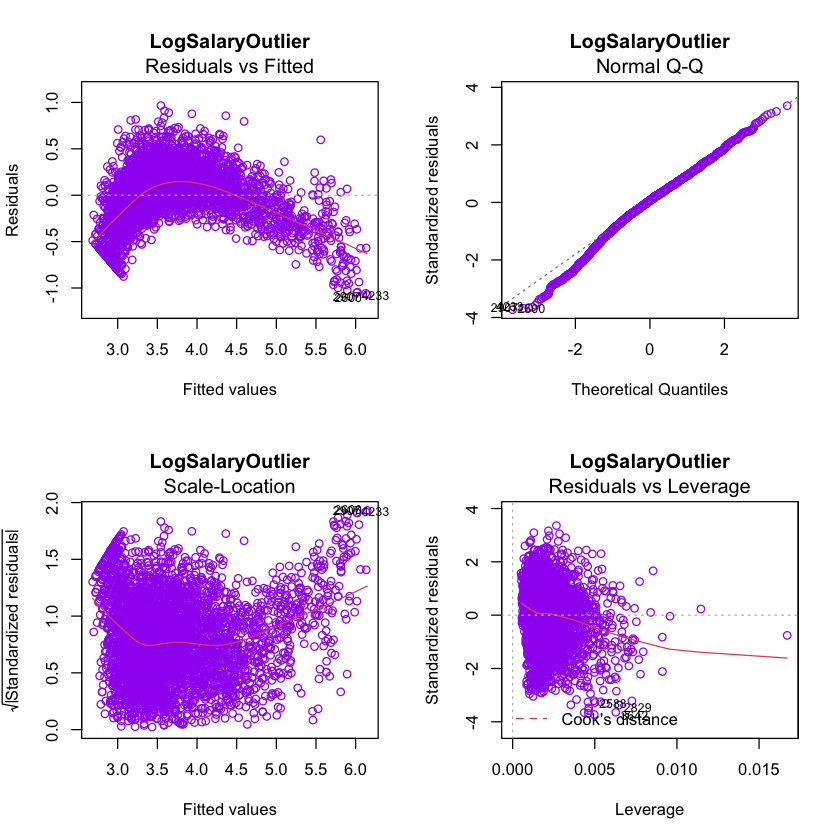

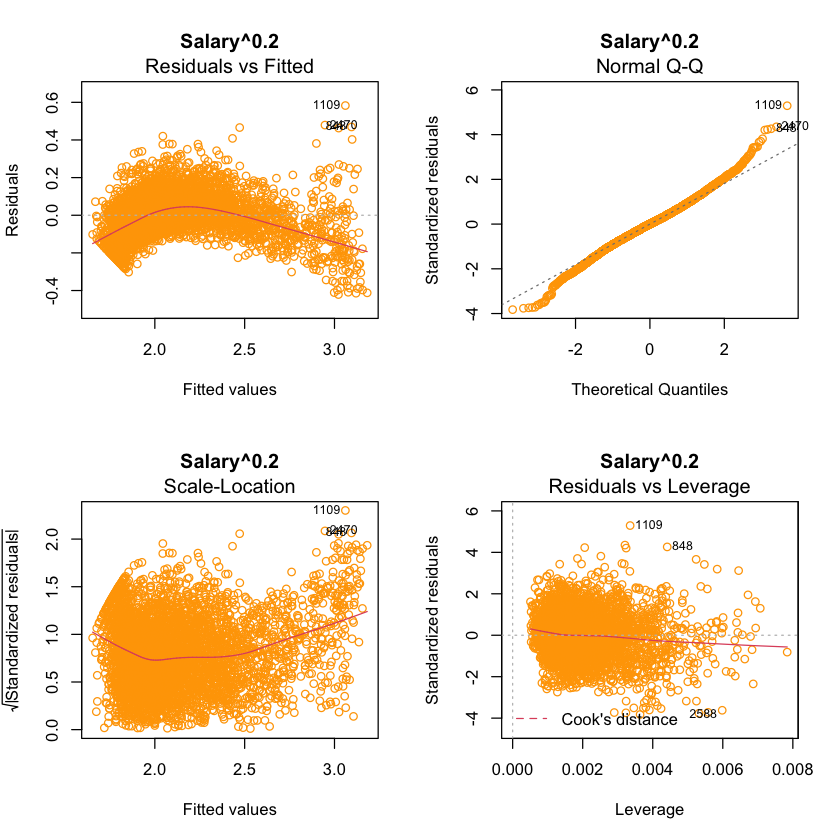

In [679]:
par(mfrow=c(2,2))
plot(lmmul, col = 'light blue', main = "OriginalSalary")
plot(lmmul1, col = 'pink', main = "OutlierSalaryLog")
plot(lmmul2, col = 'purple', main = "LogSalaryOutlier")
plot(lmmul3, col = 'orange', main = "Salary^0.2")

In [680]:
#test for HOMOSCADASTICITY
ncvTest(lmmul)
ncvTest(lmmul1)
ncvTest(lmmul2)
ncvTest(lmmul3)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 25.68847, Df = 1, p = 4.0122e-07

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 103.3593, Df = 1, p = < 2.22e-16

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 34.98714, Df = 1, p = 3.3189e-09

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 324.6992, Df = 1, p = < 2.22e-16

# LM LOG Salary - with Mulcol removed and other insignificant variables removed - jobsat -homeown
Minimal change in Adgusted R^2 suggests these variables are not most significant 

In [681]:
lmfit1 <- lm(log(salary) ~. -edcat -age -cars -address -jobsat -homeown, income )  #log salary on original data
                                                  #LM excluding multicoliniarity
summary(lmfit1)                                    #Adjusted R-squared:  0.8293

lmfit2 <- lm(log(salary) ~. -edcat -age -cars -address -jobsat -homeown, data ) #Salary Outliers removed then log
summary(lmfit2)                                                  #Adjusted R^2 0.8147

lmfit3 <- lm(salary ~. -edcat -age -cars -address -jobsat -homeown, datalog )  #log salary then outliers removed
                                                  #LM excluding multicoliniarity
summary(lmfit3)                                    #Adjusted R-squared:  0.8321

lmfit4 <- lm(salary ~. -edcat -age -cars -address -jobsat -homeown, expdata )  #salary^0.2, othdebt &creddebt ^0.1 then outliers removed
                                                  #LM excluding multicoliniarity
summary(lmfit4)                                                  #Adjusted R-squared:  0.8821


Call:
lm(formula = log(salary) ~ . - edcat - age - cars - address - 
    jobsat - homeown, data = income)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06866 -0.18290  0.03452  0.20774  0.97707 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.8068856  0.0234789 119.549  < 2e-16 ***
yrsed        0.0066147  0.0015066   4.391 1.16e-05 ***
yrsempl     -0.0039707  0.0005711  -6.952 4.11e-12 ***
creddebt     0.0102189  0.0018580   5.500 4.01e-08 ***
othdebt      0.0090417  0.0012878   7.021 2.53e-12 ***
default     -0.0734522  0.0121382  -6.051 1.55e-09 ***
carvalue     0.0309371  0.0002944 105.097  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3116 on 4501 degrees of freedom
Multiple R-squared:  0.8295,	Adjusted R-squared:  0.8293 
F-statistic:  3650 on 6 and 4501 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(salary) ~ . - edcat - age - cars - address - 
    jobsat - homeown, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17509 -0.16319  0.02305  0.19116  1.02309 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.7485988  0.0233071 117.930  < 2e-16 ***
yrsed        0.0051990  0.0014903   3.488 0.000491 ***
yrsempl     -0.0050178  0.0005667  -8.854  < 2e-16 ***
creddebt     0.0756546  0.0052512  14.407  < 2e-16 ***
othdebt      0.0123649  0.0016947   7.296 3.54e-13 ***
default     -0.0887544  0.0124858  -7.108 1.38e-12 ***
carvalue     0.0312733  0.0003375  92.658  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2965 on 4090 degrees of freedom
Multiple R-squared:  0.815,	Adjusted R-squared:  0.8147 
F-statistic:  3003 on 6 and 4090 DF,  p-value: < 2.2e-16



Call:
lm(formula = salary ~ . - edcat - age - cars - address - jobsat - 
    homeown, data = datalog)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08738 -0.17077  0.02026  0.18898  0.93433 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.6189223  0.0227447 115.144  < 2e-16 ***
yrsed        0.0052194  0.0014159   3.686  0.00023 ***
yrsempl     -0.0050661  0.0005396  -9.388  < 2e-16 ***
creddebt     0.0889899  0.0093320   9.536  < 2e-16 ***
othdebt      0.1488788  0.0080473  18.500  < 2e-16 ***
default     -0.1116257  0.0116900  -9.549  < 2e-16 ***
carvalue     0.0289719  0.0003138  92.319  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2887 on 4330 degrees of freedom
Multiple R-squared:  0.8323,	Adjusted R-squared:  0.8321 
F-statistic:  3582 on 6 and 4330 DF,  p-value: < 2.2e-16



Call:
lm(formula = salary ~ . - edcat - age - cars - address - jobsat - 
    homeown, data = expdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42921 -0.06726 -0.00051  0.06741  0.57991 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.1758934  0.0204158  57.597  < 2e-16 ***
yrsed        0.0024671  0.0005369   4.595 4.45e-06 ***
yrsempl     -0.0010696  0.0002028  -5.274 1.40e-07 ***
creddebt     0.2092165  0.0190140  11.003  < 2e-16 ***
othdebt      0.3630802  0.0206762  17.560  < 2e-16 ***
default     -0.0406169  0.0043146  -9.414  < 2e-16 ***
carvalue     0.0126658  0.0001112 113.869  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1106 on 4462 degrees of freedom
Multiple R-squared:  0.8823,	Adjusted R-squared:  0.8821 
F-statistic:  5574 on 6 and 4462 DF,  p-value: < 2.2e-16


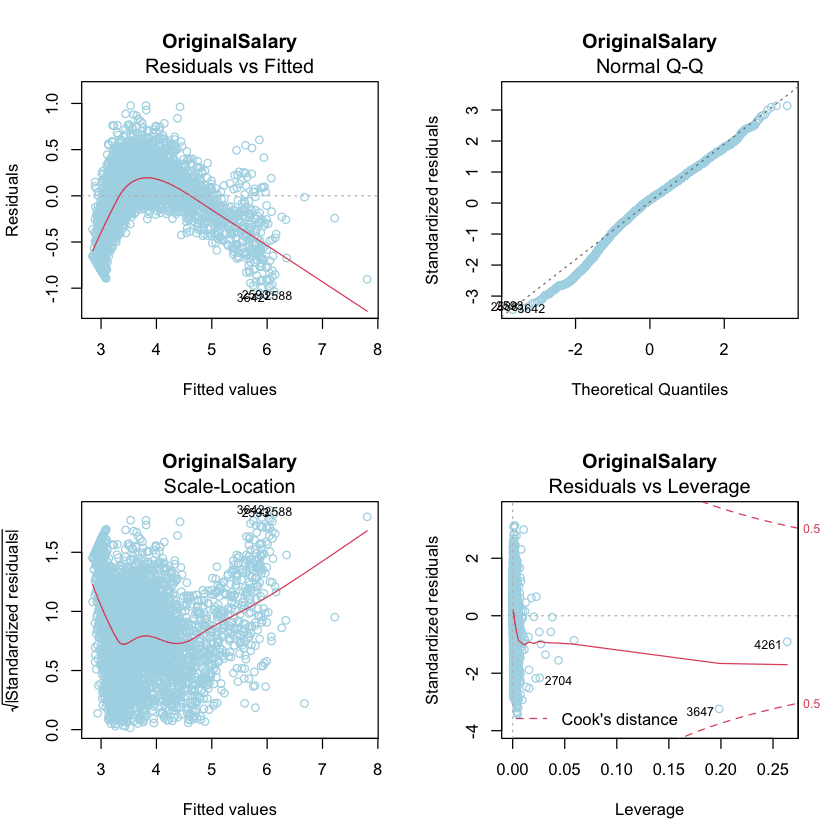

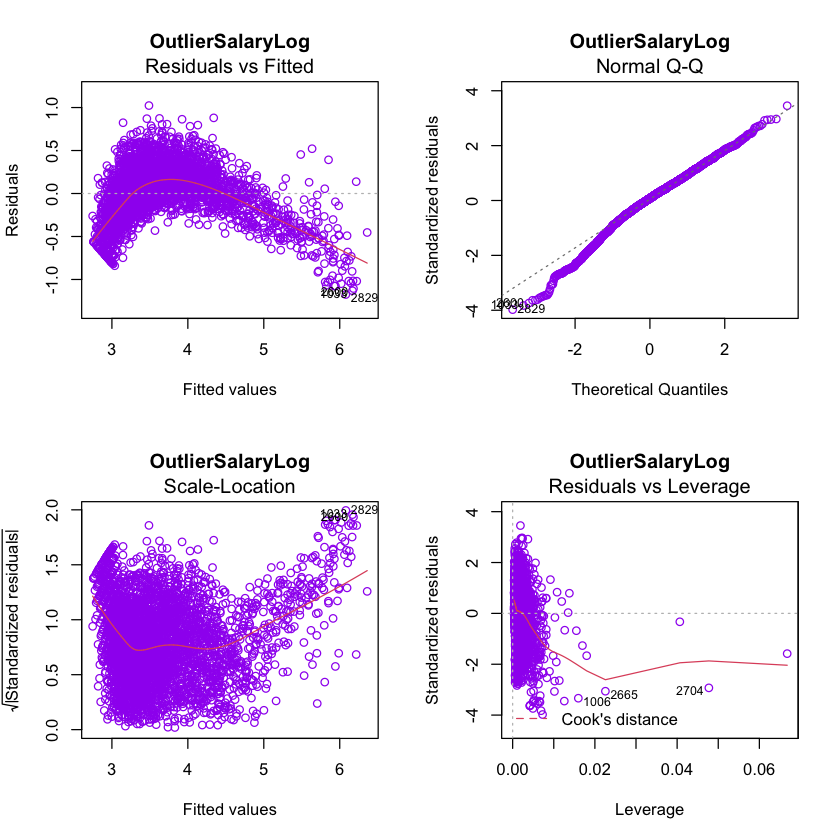

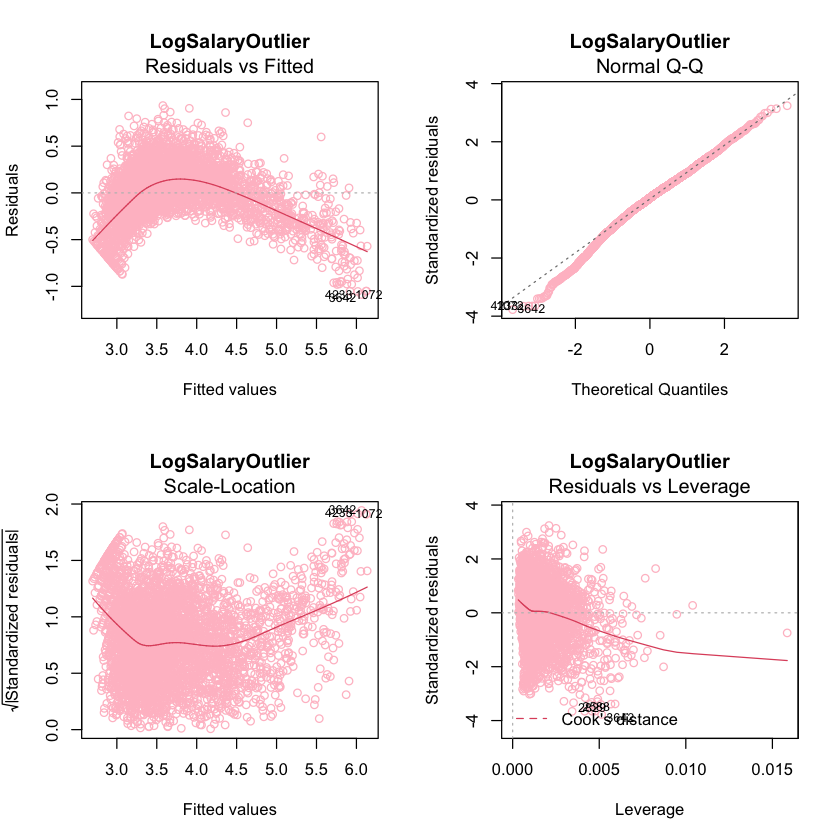

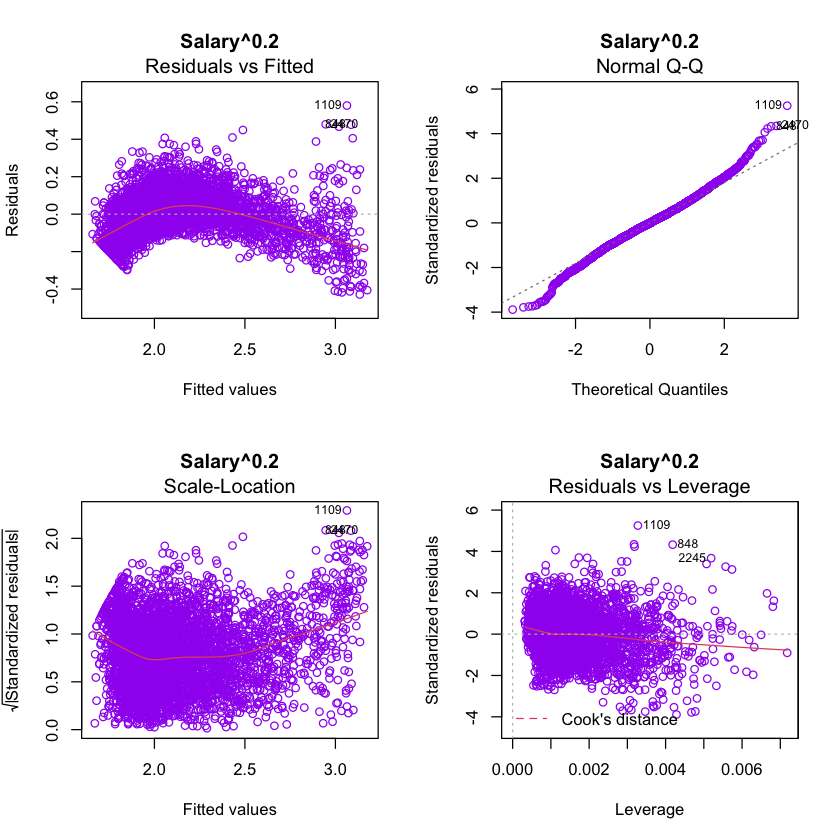

In [682]:
par(mfrow=c(2,2))
plot(lmfit1, col = 'light blue', main = "OriginalSalary")
plot(lmfit2, col = 'purple', main = "OutlierSalaryLog")
plot(lmfit3, col = 'pink', main = "LogSalaryOutlier")
plot(lmfit4, col = 'purple', main = "Salary^0.2")

In [688]:
#test for HOMOSCADASTICITY
ncvTest(lmfit1)
ncvTest(lmfit2)
ncvTest(lmfit3)
ncvTest(lmfit4)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 30.45111, Df = 1, p = 3.4239e-08

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 112.3308, Df = 1, p = < 2.22e-16

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 37.87407, Df = 1, p = 7.5461e-10

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 327.8491, Df = 1, p = < 2.22e-16

In [ ]:
# LM LOG Salary - with Mulcol removed and other insignificant variables removed - jobsat -homeown
#and transforms made to other variables 
Minimal change in Adgusted R^2 suggests these variables are not most significant 

In [757]:
ulm <- lm(log(salary) ~yrsed
             +sqrt(creddebt) +sqrt(othdebt)
             +log(carvalue), income)  #Original salary log
                                                  #LM excluding multicoliniarity
summary(ulm)                                    #Adjusted R-squared:  0.9269 


ulm1 <- lm(log(salary) ~yrsed
             +sqrt(creddebt)+ sqrt(othdebt)
             +log(carvalue), data )             # Salary Creddebt Othdebt Outliers removed then log 
                                                  #LM excluding multicoliniarity and insignif variables with transforms
summary(ulm1)                                     #Adjusted R-squared:   0.9173 

ulm2 <- lm(salary ~yrsed +creddebt:othdebt
             +creddebt +othdebt 
            +log(carvalue), datalog)  #log salary, sqrt(othdebt &creddebt) then outliers removed
                                                  #LM excluding multicoliniarity and insignif variables with transforms
summary(ulm2)                                    #Adjusted R-squared:   0.9206 

ulm3 <- lm(salary ~yrsed
             +creddebt +othdebt
             +log(carvalue), expdata )  #salary^0.2, othdebt&creddebt ^0.1 then outliers removed 
                                                  #LM excluding multicoliniarity and insignif variables with transforms
summary(ulm3)                                    #Adjusted R-squared:  0.9042

ulm4 <- lm(salary ~yrsed
             +creddebt +othdebt
             +log(carvalue), logall)  #salary othdebt&creddebt log then outliers removed 
                                                  #LM excluding multicoliniarity and insignif variables with transforms
summary(ulm4)                                    #Adjusted R-squared:  0.9232 



Call:
lm(formula = log(salary) ~ yrsed + sqrt(creddebt) + sqrt(othdebt) + 
    log(carvalue), data = income)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57659 -0.13465 -0.01759  0.11429  1.13494 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.9342513  0.0171474  54.484  < 2e-16 ***
yrsed          0.0042069  0.0009416   4.468  8.1e-06 ***
sqrt(creddebt) 0.0642086  0.0055983  11.469  < 2e-16 ***
sqrt(othdebt)  0.0755719  0.0047552  15.893  < 2e-16 ***
log(carvalue)  0.8444376  0.0053473 157.919  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2039 on 4503 degrees of freedom
Multiple R-squared:  0.927,	Adjusted R-squared:  0.9269 
F-statistic: 1.429e+04 on 4 and 4503 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(salary) ~ yrsed + sqrt(creddebt) + sqrt(othdebt) + 
    log(carvalue), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51387 -0.13207 -0.01598  0.11104  1.13030 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.9493019  0.0174680  54.345  < 2e-16 ***
yrsed          0.0035905  0.0009573   3.751 0.000179 ***
sqrt(creddebt) 0.0374598  0.0081934   4.572 4.97e-06 ***
sqrt(othdebt)  0.0719122  0.0052137  13.793  < 2e-16 ***
log(carvalue)  0.8531628  0.0054836 155.585  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.198 on 4092 degrees of freedom
Multiple R-squared:  0.9174,	Adjusted R-squared:  0.9173 
F-statistic: 1.136e+04 on 4 and 4092 DF,  p-value: < 2.2e-16



Call:
lm(formula = salary ~ yrsed + creddebt:othdebt + creddebt + othdebt + 
    log(carvalue), data = datalog)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5541 -0.1333 -0.0162  0.1134  1.1336 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.9527141  0.0194262  49.043  < 2e-16 ***
yrsed            0.0040760  0.0009351   4.359 1.34e-05 ***
creddebt         0.0408115  0.0129453   3.153  0.00163 ** 
othdebt          0.0559914  0.0083901   6.674 2.81e-11 ***
log(carvalue)    0.8532103  0.0054095 157.724  < 2e-16 ***
creddebt:othdebt 0.0059497  0.0055814   1.066  0.28649    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1986 on 4331 degrees of freedom
Multiple R-squared:  0.9207,	Adjusted R-squared:  0.9206 
F-statistic: 1.005e+04 on 5 and 4331 DF,  p-value: < 2.2e-16



Call:
lm(formula = salary ~ yrsed + creddebt + othdebt + log(carvalue), 
    data = expdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25559 -0.06614 -0.01130  0.05142  0.87002 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.6304957  0.0159157  39.615  < 2e-16 ***
yrsed         0.0018899  0.0004624   4.087 4.45e-05 ***
creddebt      0.1378533  0.0167619   8.224 2.55e-16 ***
othdebt       0.2164132  0.0189181  11.439  < 2e-16 ***
log(carvalue) 0.3670656  0.0026601 137.991  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09971 on 4464 degrees of freedom
Multiple R-squared:  0.9043,	Adjusted R-squared:  0.9042 
F-statistic: 1.055e+04 on 4 and 4464 DF,  p-value: < 2.2e-16



Call:
lm(formula = salary ~ yrsed + creddebt + othdebt + log(carvalue), 
    data = logall)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54230 -0.13854 -0.01783  0.11395  1.26608 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0365718  0.0196737  52.688  < 2e-16 ***
yrsed         0.0040324  0.0009597   4.202 2.70e-05 ***
creddebt      0.0245958  0.0034005   7.233 5.53e-13 ***
othdebt       0.0548289  0.0042149  13.008  < 2e-16 ***
log(carvalue) 0.8646281  0.0055061 157.031  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2065 on 4453 degrees of freedom
Multiple R-squared:  0.9233,	Adjusted R-squared:  0.9232 
F-statistic: 1.34e+04 on 4 and 4453 DF,  p-value: < 2.2e-16


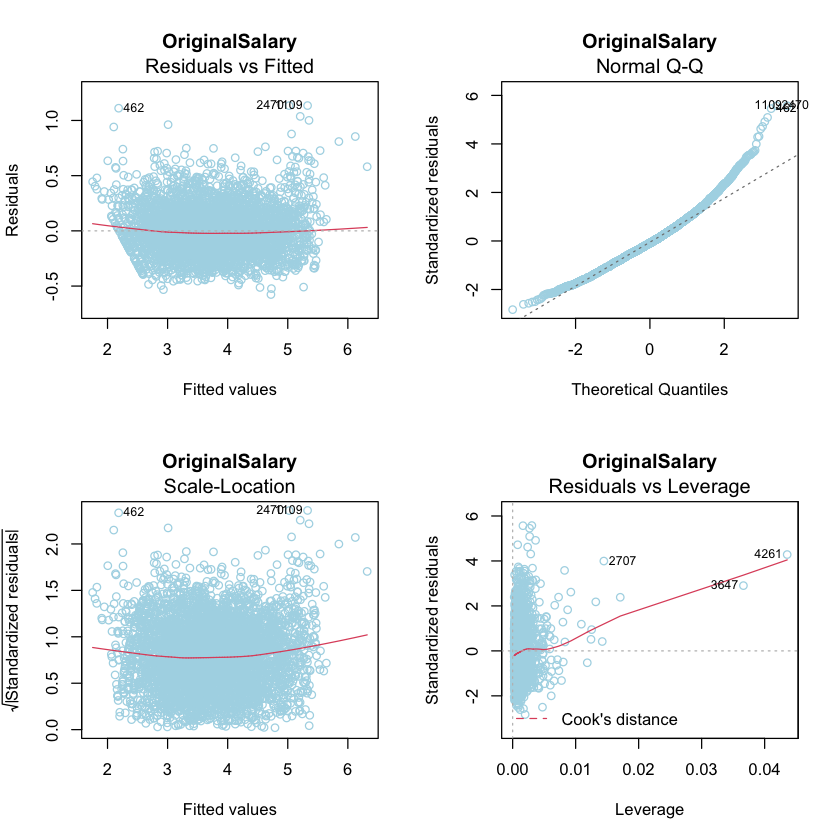

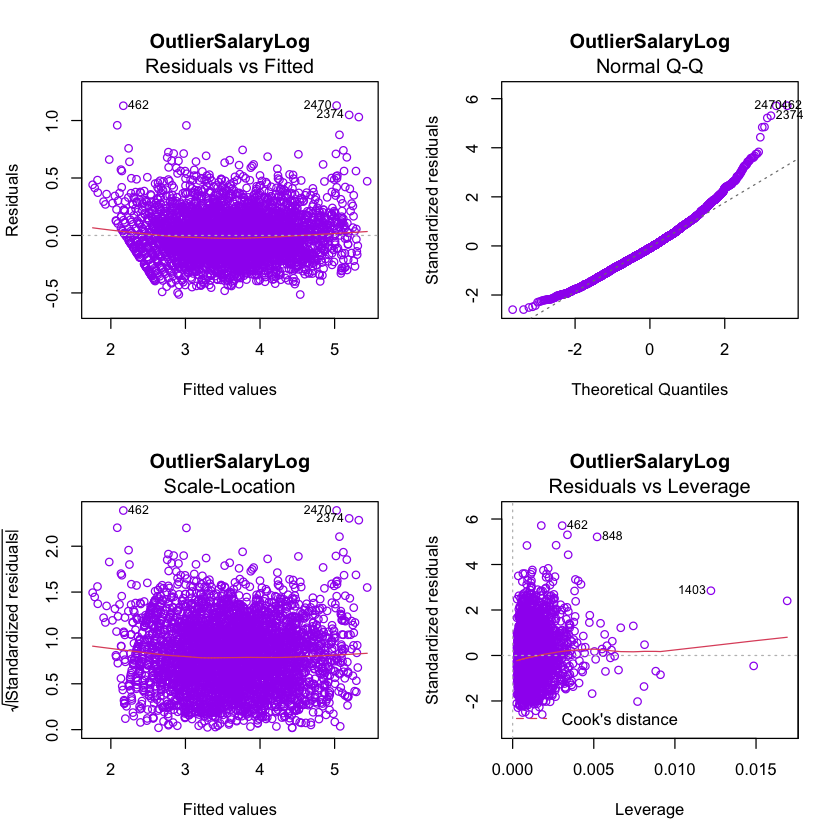

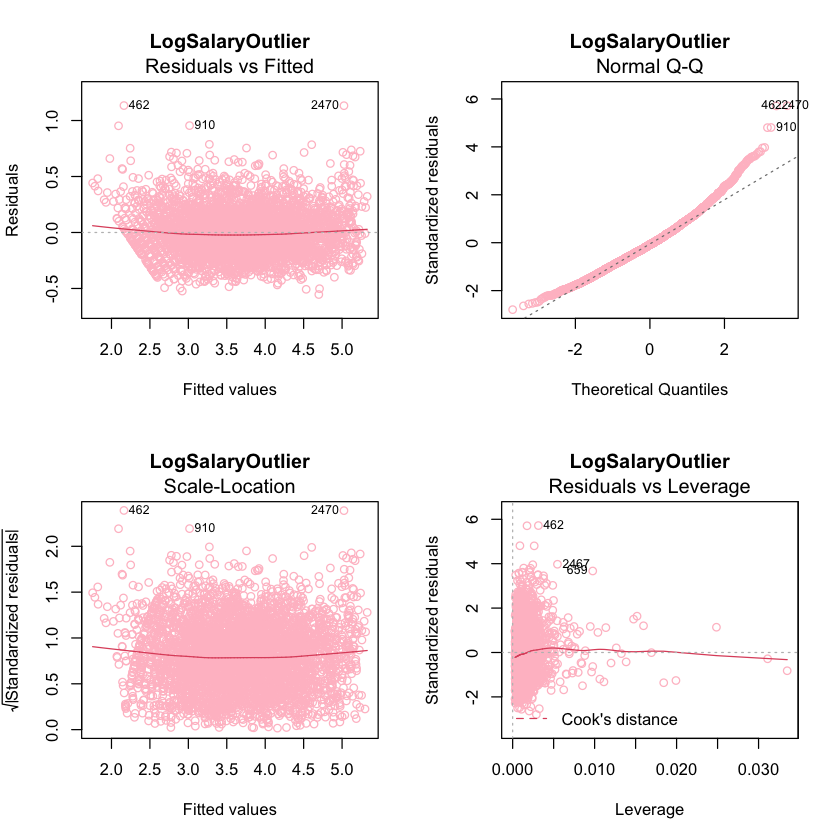

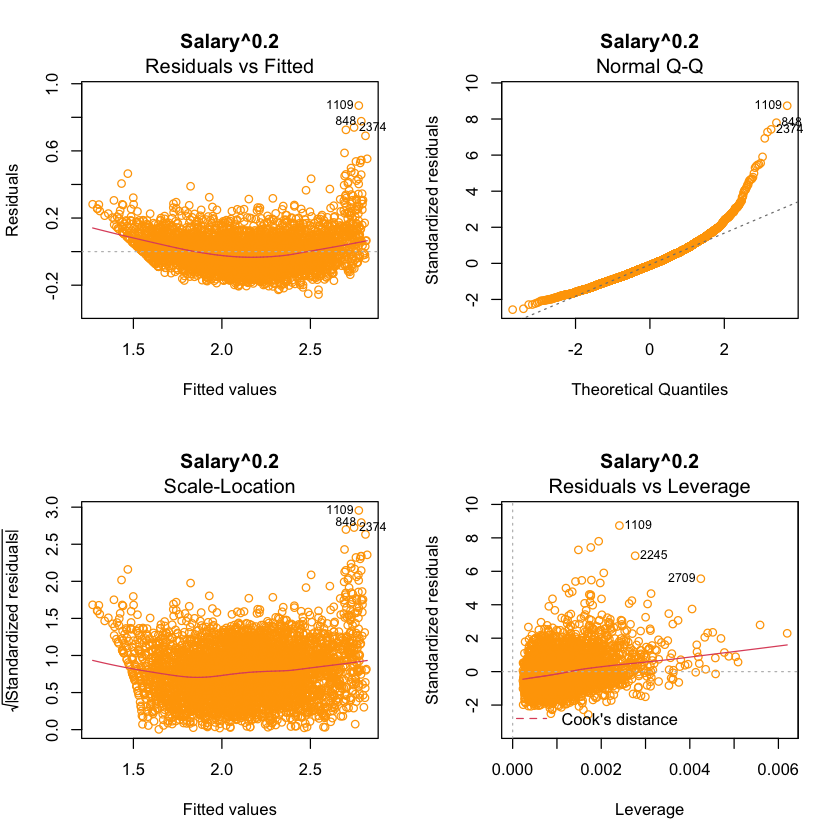

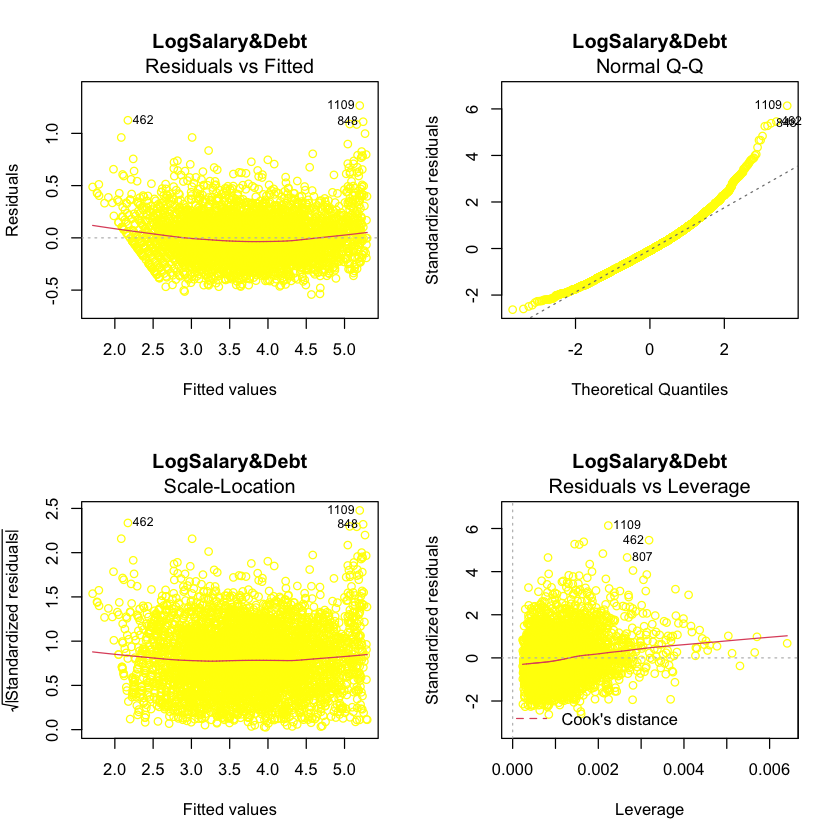

In [758]:
par(mfrow=c(2,2))
plot(ulm, col = 'light blue', main = "OriginalSalary")
plot(ulm1, col = 'purple', main = "OutlierSalaryLog")
plot(ulm2, col = 'pink', main = "LogSalaryOutlier")
plot(ulm3, col = 'orange', main = "Salary^0.2")
plot(ulm4, col = 'yellow', main = "LogSalary&Debt")

In [759]:
#test for HOMOSCADASTICITY
ncvTest(ulm) #OG data 
ncvTest(ulm1)#Outliers removed
ncvTest(ulm2)#Log salary then outliers removed
ncvTest(ulm3)#^0.2 Salary Creddebt and Othdebt then outliers removed
ncvTest(ulm4)#Log Salary Creddebt and Othdebt then outliers removed

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 23.2995, Df = 1, p = 1.3864e-06

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.780322, Df = 1, p = 0.37704

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.756564, Df = 1, p = 0.18505

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 463.3376, Df = 1, p = < 2.22e-16

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 15.33522, Df = 1, p = 9.0023e-05


	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.045697, p-value = 0.0001632
alternative hypothesis: two-sided


yrsed sqrt(creddebt)  sqrt(othdebt)  log(carvalue) 
      1.037476       2.003249       2.305579       1.801356

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 23.2995, Df = 1, p = 1.3864e-06

[1] 0

 lag Autocorrelation D-W Statistic p-value
   1      0.03879831      1.922313   0.008
 Alternative hypothesis: rho != 0

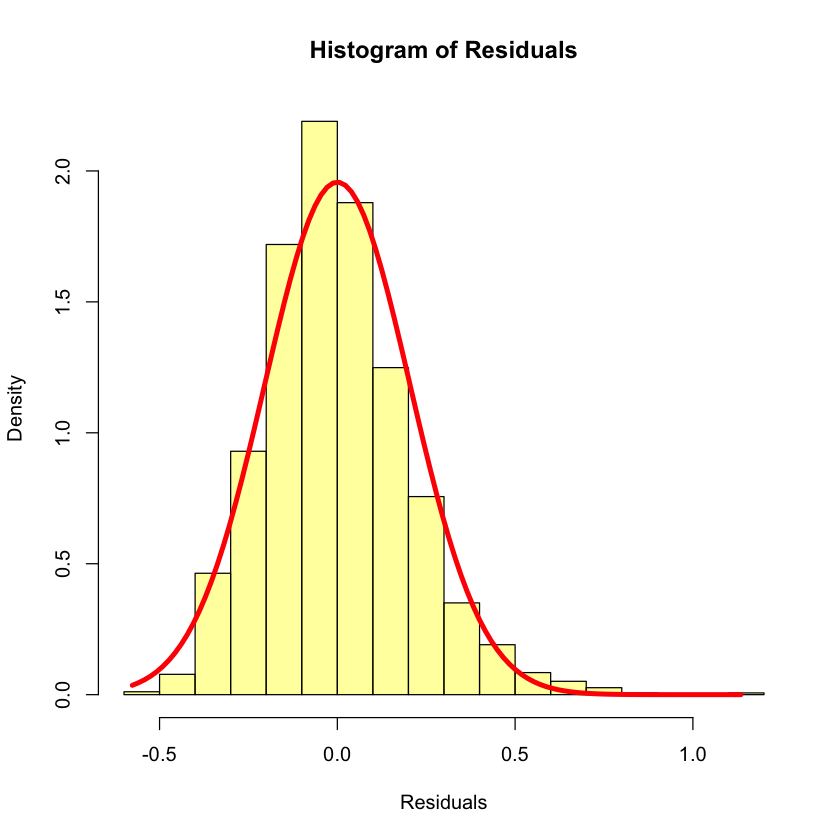

In [734]:
#OG data 
res <- summary(ulm)$residuals
plotVar(res, label='Residuals')
ks(res)
vif(ulm)
ncvTest(ulm)
sum(cooks.distance(ulm)>1)
durbinWatsonTest(ulm)


	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.037344, p-value = 0.006601
alternative hypothesis: two-sided


yrsed sqrt(creddebt)  sqrt(othdebt)  log(carvalue) 
      1.030469       1.542751       1.789984       1.624262

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.780322, Df = 1, p = 0.37704

[1] 0

 lag Autocorrelation D-W Statistic p-value
   1      0.04299189      1.913883   0.004
 Alternative hypothesis: rho != 0

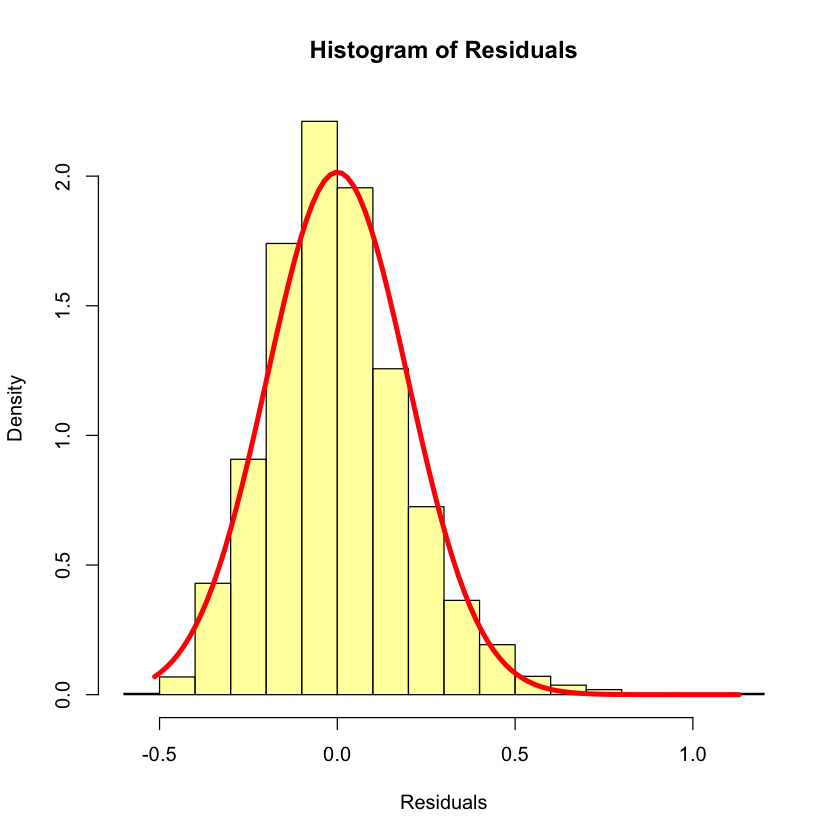

In [735]:
#outliers from Salary Creddebt Othdebt removed and then transforms made 
res <- summary(ulm1)$residuals
plotVar(res, label='Residuals')
ks(res)
vif(ulm1)
ncvTest(ulm1)
sum(cooks.distance(ulm1)>1)
durbinWatsonTest(ulm1)


	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.040581, p-value = 0.001582
alternative hypothesis: two-sided


yrsed         creddebt          othdebt    log(carvalue) 
        1.033185         7.659780         4.355353         1.725035 
creddebt:othdebt 
       13.532082

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.756564, Df = 1, p = 0.18505

[1] 0

 lag Autocorrelation D-W Statistic p-value
   1       0.0419344      1.916015    0.01
 Alternative hypothesis: rho != 0

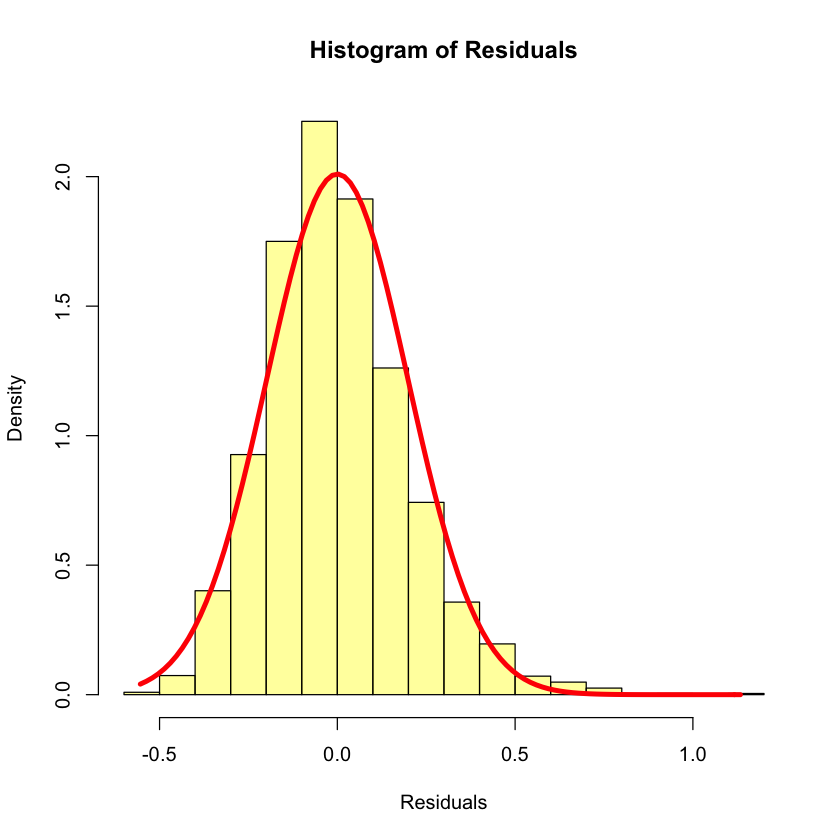

In [736]:
#Log salary then outliers removed
res <- summary(ulm2)$residuals
plotVar(res, label='Residuals')
ks(res)
vif(ulm2)
ncvTest(ulm2)
sum(cooks.distance(ulm2)>1)
durbinWatsonTest(ulm2)


	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.063101, p-value = 3.741e-08
alternative hypothesis: two-sided


yrsed      creddebt       othdebt log(carvalue) 
     1.036399      1.931693      2.228981      1.821453

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 463.3376, Df = 1, p = < 2.22e-16

[1] 0

 lag Autocorrelation D-W Statistic p-value
   1      0.03137446       1.93722    0.02
 Alternative hypothesis: rho != 0

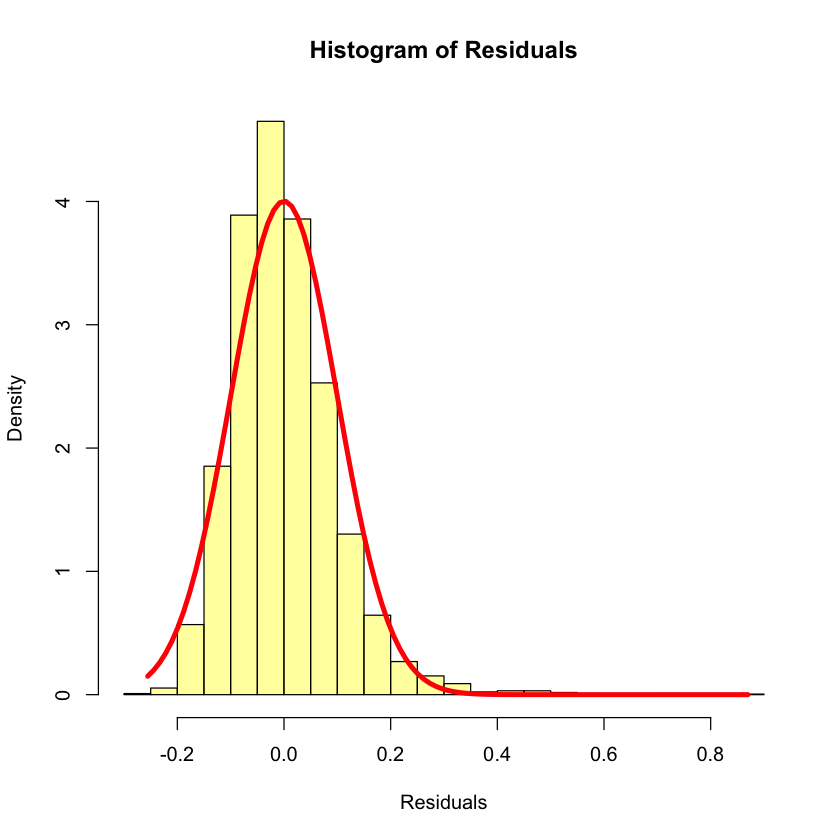

In [737]:
#^0.2 Salary Creddebt and Othdebt then outliers removed
res <- summary(ulm3)$residuals
plotVar(res, label='Residuals')
ks(res)
vif(ulm3)
ncvTest(ulm3)
sum(cooks.distance(ulm3)>1)
durbinWatsonTest(ulm3)


	Two-sample Kolmogorov-Smirnov test

data:  x and rnorm(mean = mean(x), sd = sd(x), n = length(x))
D = 0.04262, p-value = 0.0006084
alternative hypothesis: two-sided


yrsed      creddebt       othdebt log(carvalue) 
     1.037506      1.884462      2.194801      1.820579

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 15.33522, Df = 1, p = 9.0023e-05

[1] 0

 lag Autocorrelation D-W Statistic p-value
   1      0.03311768      1.933668   0.026
 Alternative hypothesis: rho != 0

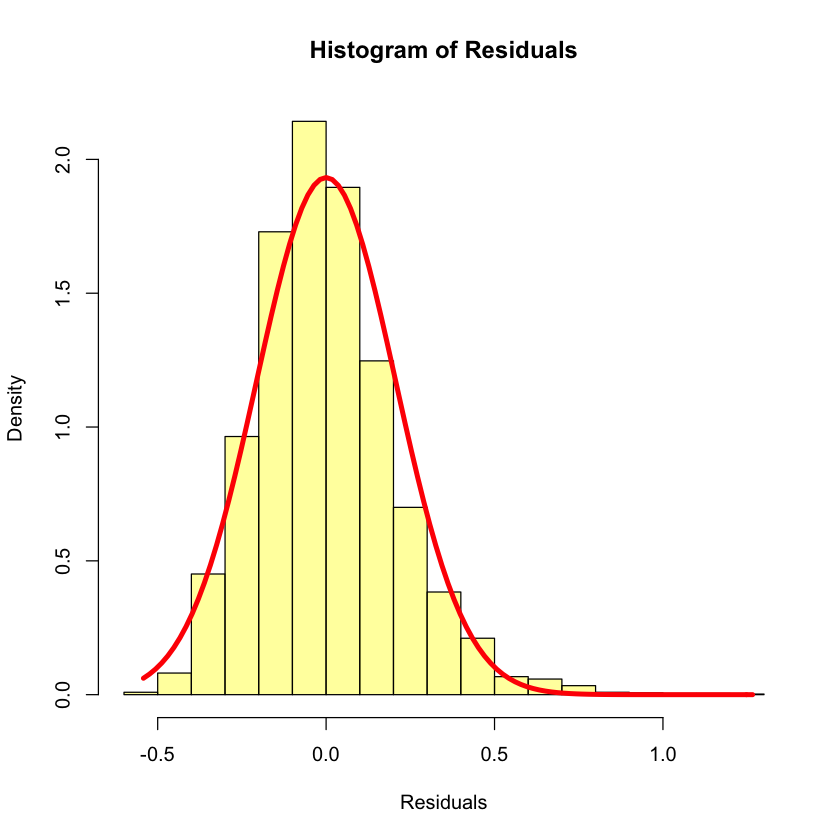

In [749]:
#Log Salary Creddebt and Othdebt then outliers removed
res <- summary(ulm4)$residuals
plotVar(res, label='Residuals')
ks(res)
vif(ulm4)
ncvTest(ulm4)
sum(cooks.distance(ulm4)>1)
durbinWatsonTest(ulm4)